# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс. Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Цели исследования

1. Определить рыночную стоимость недвижимости в Санкт-Петербурге и городах вокруг.

2. Построить систему, которая может выявить аномалии и дать общую картину о рынке недвижимости.

3. Установить факторы, влияющие на ценообразование

# Для исследования предоставлен файл real_estate_data.csv

**В ходе иследования** предстоит проверить данные на наличие ошибок и пропусков, понять их влияние на проект в целом и принять решение об удалении или замене на какие-то средние (или медианные), логичные значения. 

**Этапы исследования**: 

1. Обзор данных.

2. Подготовка данных к анализу: удаление пропусков, замена пропусков, очистки аномалий. 

3. Расчёты новых данных, которые потребуются для анализа, и добавление их в таблицу. 

4. Проведение самого анализа данных для рынка недвижимости Санкт-Петербурга и Леонобласти.

5. Изучение факторов, которые могут влиять на цену недвижимости, и их влияния.

6. Написание общего вывода о проведённой работе и исследовании.

# Описание столбцов файла


- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлени

### Откройте файл с данными и изучите общую информацию. 

Пока что я буду описывать абсолютно всё, что я вижу, думаю. Тут дело не только в том, что это, возможно, поможет дальше, но и в том, что я риелтор с немалым опытом.

In [2]:
# Импорт требующихся библиотек

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
except:
    data = ('real_estate_data.csv')
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
# Копия датасета
data_2 = data.copy()
display(data_2.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


На **первый** взгляд у нас проблемы в именах столбцов, пропуски в некритичных местах. 
Некоторые пробелы можно было бы закрыть, зная район расположения квартир. Те же пруды или парки. Нет данных по наличию парковочных мест / паркинга, а это немаловажный фактор, нет информации лифтах (1 или 2, включая грузовой). 

И явная и критичная для хорошего анализа нехватка данных о **первоначальной** цене. Правильная цена - залог первого шага к успешной и быстрой продаже. **Ещё не хватает данных о том**, по какой причине объявление закрыто - продано, сняли с продажи. По какой цене продано?

In [6]:
data.info()
first_len = data.shape[0]
first_len
# Основная информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

23699

У меня есть **22 столбца**. В них множество пустых значений, всего **23699 записей**. **Типы**: int64, float64, object, bool. Замены типов требуют пока что строка `is_apartment`, так как по сути булев тип, `first_day_exposition` на `datetime` для дальнешей работы с целями исследования. А также всё, что содержит метры (не квадратные) и количества: балконы, цена, дни публикации, количество прудов и парков, расстояние до оных в метрах, расстояние до аэропорта, этажность.

In [4]:
print(data.isna().sum())

# Посмотрим на пропуски

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [7]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Итак, у меня пропуски в 14 столбцах. Это много. Среди вопросов исследования есть и те, которым эти пропуски помешают или по меньшей мере в некоторой степени картину могут изменить. Это срок размещения, площадь кухни и жилая.
Про %: 
- высота потолков - 39%;
- жилая площадь - 8%;
- кухни - 10%;
- апартаменты - 88%;
- балконы - 49%;
- растояние до аэропорта - 23%; 
- расстояние до центра - 23%;
- парки вокруг - 23%; 
- расстояние до парка - 66%;
- пруды вокруг - 23%; 
- расстояние до прудов - 62%;
- дни публикации - 13%.

В разделе предобработки поправим. Причины пропусков опишу там же. Но вообще несколько повторов по 23% наводит на некоторые мысли о техничности, а не ленности людской.

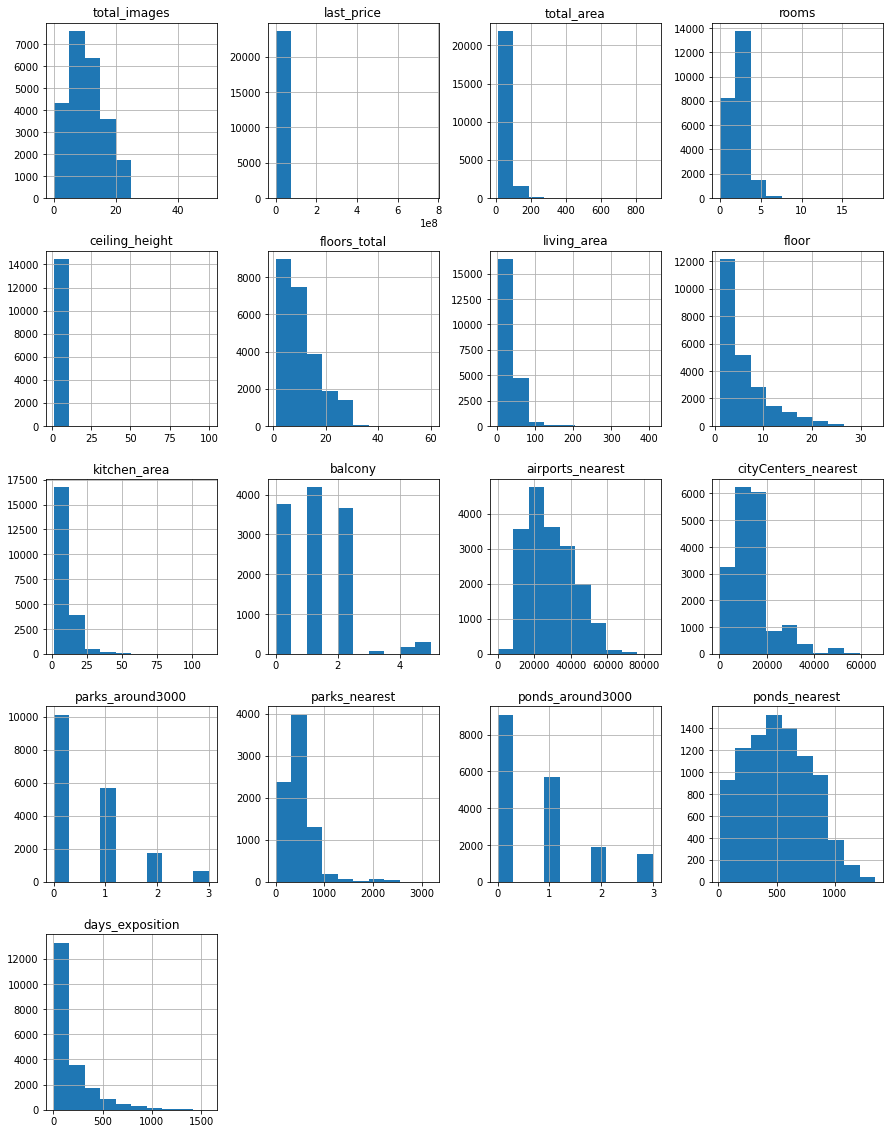

In [6]:
data.hist(figsize=(15, 20));

# Гистограмма для чуть более близкого знакомства с датафреймом.

Это пока первый взгляд на гистограммы. Пристрелочный. Скорее, описание для себя того, что я вижу.
- **Фотографии**: от нуля до чуть более 20. Пик на 5-10, 10-15 (более 7 тысяч и 6 тысяч соответственно). При этом много и нулевых значений, то есть, объявлений без фото вообще.

- **Цена**: на момент снятия с публикации - нечто непонятное. От 0 до 1 млрд. Рассморим подробно позднее.

- **Общая площадь**: примерно до 100 метров в наибольшем количестве. Более 20000. От 100 до 200 метров ещё примерно 1800-2000 объектов и незначительное число жилья выходит за 200 метров. Его, *возможно*, отброшу, так как не самое типичное жильё, которое для средних объектов только мажет картину.

- **Жилая площадь**: до 40-45 метров. Более 15 тысяч значений. Ещё около 5000 значений - до 80-90 метров, небольшой хвост за сто метров и уж совсем тонкий хвостик к двумста метрам. По всей видимости, всё же придётся отсечь квартиры более 200 метров общей площади. 

- **Площадь кухни**: почти 17000 значений - до 12 метров. От 12 до чуть менее 25 ещё около 3000. Остальные свыше 25 метров и по числу незначительны.

- **Комнаты**: имеют чёткий ноль. Грустно. Будем смотреть по площади, что там может быть. Плюс, как вариант, это могут быть студии и апартаменты. Узнаем дальше. **Основная масса** похожа на 2-3 комнаты. 

- **Высота потолков**: без нуля, что бесконечно радует. Однако чуть ли не до 10 метров, а это уже явные описки в объявлениях. Нужно будет отработать. 

- **Этаж**: преобладание 1-4 этажей (чуть выше 12 тысяч), затем от 4 до 8 (около 5 тысяч) и до 10 этажа ещё примерно 3000 и далее по ниспадающей до 27-28 примерно. Более точно посмотрим потом, если пригодится. 

- **Этажность**: основная масса напоминает 1-5 этажи (примемрно 7 тысяч), что не особо удивительно для Петербурга и предместий. Далее от 5 до 12 (около 8 тысяч, что тоже не удивительно для нового Ленинграда и ближайших наспунктов типа Шушар). Примерно 4000 на 12-18 этажей и от 18 до 22-23 ещё примерно 2000. Чуть меньше до 30 этажаей, а ещё есть хвост до почти 40, что напоминает уже выброс. Да и этажности такой в С.-Пб. и рядом я не припомню. 

- **Балконы**: всё в принципе логично, кроме 4-5 балконов. С другой стороны, есть недвижимость с кучей лоджий/балконов, которые расположены в каждой комнате. Пока за выброс не считаю.

- **Близость аэропорта**: довольно спорный момент с точки зрения удобства. С одной стороны, можно сдавать для приезжих, с другой - шумно ужасно. **Основная** масса от 10 до 32 км с пиком в районе 19-23 км. На 3 и 4 местах до 40 и до 50 км (3 и 2 тысячи значений). и далее до почти 80. 

- **Расстояние о центра Петербурга**: чуть более 15 тысяч значений это расстоянияя до 20 км. Из них наиболее близкие (от 0 до 9 км) - немногим больше 3 тысяч. Ещё в районе 2.5 тысяч единиц - жильё на расстоянии от 20 до 40 км от центра города. 

- **Парки**: более 10000 значений говорят об отстутствии парков радиусе 3 км. Довольно странно для Петербурга. Вопрос, кто что считает парком и парковой зоной? Просто ставили 0? Чуть менее 6 тысяч значений - 1 парк. Чуть менее 2 тысяч - 2 парков. И около 6-7 сотен на три парка. Больше всего парков на **расстоянии** до 1 км - почти 8000. С пиком в районе 500 метров. 

- **Пруды**: то же, что с парками по числу. С той лишь разницей, что ноль - около 7 тысяч значений, а 3 - почти 2 тысячи. По **расстоянию** пруды похожи на парки также - более 8000 значений до 1 км, причём половина - до 500 метров. 

- **Дни публикации**: хочу сразу отметить, что снятие с публикации не является подтверждением факта продажи. Опыт говорит, что примерно не менее четверти объявлений снимают из-за отмены продажи. То есть, снятие публикации через неделю, месяц, два не говорит, что квартиру продали в 25% случаев. Это и полная отмена, и смена риелтора, когда позднее новый снова даст объявление, и просто пауза на время. Ну и к гистограмме. У нас 13.42% пропусков в этом столбце. **Основная** масса данных же говорит, что срок публикации примерно 150-160 дней. Это около 13000 значений. Ещё почти 4000 это значения от 150-160 до 320 дней. Что довольно много. Далее хвост от примерно 1900 в сторону **трёхлетнего** срока публикации. Вполне возможно, но проверить стоит.

In [7]:
data.describe()

# Посмотрим описание датафрема методами Python

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Интересные данные. Несколько меняют картину написанного выше, уточняют её. И показывают выбросы. У нас проблема с площадями, комнатами, высотой потолков, этажностью, этажом недвижимости (возможно).

<hr>

### Предобработка данных

In [8]:
# Проверяю пропуски

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Переименование столбцов

Менять будем колонки `cityCenters_nearest`, `parks_around3000` и `ponds_around3000`. На змеиный регистр заменим всё, плюс заглавная `C` тоже не смотрится. <a id='columns'></a>

In [19]:
data = data.rename(
    columns={
        'cityCenters_nearest': 'city_centers_nearest', 
        'parks_around3000': 'parks_around_3000', 
        'ponds_around3000': 'ponds_around_3000'
    }
)

In [20]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Переименование получилось.

#### Продолжим с комнатами. 
**Для начала удалим всё, что выбивается за рамки.** <a id='rooms'></a>

In [21]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12],
      dtype=int64)

In [22]:
data.loc[data['rooms'] > 5]['rooms'].count()

# Почему не query? Потому что он даст по всем колонкам подсчёт, а мне нужно одно число.

194

<AxesSubplot:>

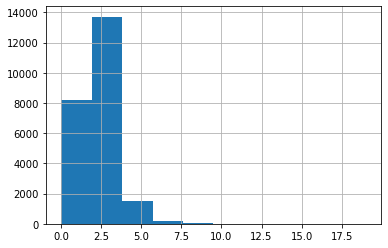

In [23]:
data['rooms'].hist()

На мой взгляд 0.82% столь ничтожно малы, что их можно откинуть без сомнений. Нельзя исключать, что у нас продавалась суперэлитная недвижимость с огромным числом квадратных метров и 10-ю спальнями. Их мало. И можно удалить. Для средних показателей средней недвижимости они не нужны, а вот повлиять могут. Если нам будет нужна элитная недвижимость, мы оценим её отдельно.

In [14]:
data = data[data['rooms'] <= 5]
print(data['rooms'].unique())
display(data.head())

[3 1 2 4 5 0]


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [15]:
second_len = data.shape[0]
second_len

23504

#### Далее к пропускам и "превышениям" балконов. 
К сожалению, без адресов невозможно понять, есть ли где-то возможность заменить пустое значение на наличие одного или нескольких балконов, потому **все отсутствующие балконы примут нулевые значения**. Тем более, что с вероятностью 99% так и есть. **Причины пропусков**: отсутствие балкона в силу которого пользователь не оставил информацию. <a id='balcony'></a>

In [16]:
for empty_values in data['balcony'].unique():
    data.loc[(data['balcony'].isna()), 'balcony'] = 0

# Меняю пустые значения на нули

Проверим, остались ли пропуски.

In [17]:
print(data['balcony'].isna().sum())

0


Посмотрим на уники балконов. И их число. Как по комнатам, так и вообще. <a id='deep_balcony_party'></a>

In [18]:
print(data['balcony'].unique()) # Уникальные значения



[0. 2. 1. 5. 4. 3.]


In [19]:
# Срез по данным, где число балконов равно числу комнат или превышает его.
balcony_and_rooms = (data
                     .query('balcony >= rooms')
                     .pivot_table(index='rooms', values='balcony', aggfunc=('first', 'count'))
                    )
balcony_and_rooms.columns = ['count', 'balcony']
display(balcony_and_rooms)


,count,balcony
rooms,,
0,197,2.0
1,2999,2.0
2,1314,2.0
3,290,5.0
4,41,5.0
5,5,5.0


В общем-то, вполне ясная картина - балконы нужно удалять и приводить в порядок.

Поищем средние и медианные значения. 

In [20]:
print('Среднее значение количества балконов:', data['balcony'].mean())
print('Медианное значение количества балконов:', data['balcony'].median())

Среднее значение количества балконов: 0.5936861810755616
Медианное значение количества балконов: 0.0


Использование медианы и среднего невозможно. Проверим, сколько у нас балконов.

In [21]:
# Цикл сокращает время на написание кода и сам код
for i in range(6):
    print('Балконы:', i, '-', data[data['balcony'] == i]['balcony'].count())

Балконы: 0 - 15121
Балконы: 1 - 4164
Балконы: 2 - 3654
Балконы: 3 - 80
Балконы: 4 - 183
Балконы: 5 - 302


Мне очень хотелось поменять значения на "1" там, где они превышают число комнат. На среднее или медианное невозможно, так как они меньше единицы или ноль. Я даже написал код для этого:

`for balcony in data['balcony'].unique():
    data.loc[(data['balcony'] == 5) & (data['rooms'] < 4), 'balcony'] = 1` и т.д. в цикле.
 
А потом решил, что для такого нестандартного количества балконов "угадайка" не лучший вариант. Всего их 565 штук, то есть, 2.38%. Могу ли я пожертвовать двумя процентами данных? Пока могу. И, собственно, убираю их. 

In [22]:
data = data[data['balcony'] < 4]
display(data.head())
print(data['balcony'].unique())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


[0. 2. 1. 3.]


Теперь количество балконов смотрится каноничнее. И всё же в данных есть проблемы. Это три балкона в "двушках" и "однушках". Или два балкона в "однушках". От этих данных уже не отделаться удалением. Поменяем всё, что выходит за рамки, на "1". Это наиболее близко к истине.

In [23]:
third_len = data.shape[0]
third_len

23019

In [24]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9024
floors_total               85
living_area              1863
floor                       0
is_apartment            20342
studio                      0
open_plan                   0
kitchen_area             2247
balcony                     0
locality_name              48
airports_nearest         5438
city_centers_nearest     5416
parks_around_3000        5415
parks_nearest           15257
ponds_around_3000        5415
ponds_nearest           14218
days_exposition          3029
dtype: int64

In [25]:
# Код для замены числа балконов в 2- и 3-комнатных квартирах
for balcony in data['balcony'].unique():
    data.loc[(data['balcony'] == 3) & (data['rooms'] < 3), 'balcony'] = 1
    data.loc[(data['balcony'] == 2) & (data['rooms'] < 2), 'balcony'] = 1
    
# Вывод на экран новых значений числа балконов.    
for i in range(6):
    print('Балконы:', i, '-', data[data['balcony'] == i]['balcony'].count())    
    

Балконы: 0 - 15121
Балконы: 1 - 5756
Балконы: 2 - 2085
Балконы: 3 - 57
Балконы: 4 - 0
Балконы: 5 - 0


Значения поменялись. Отлично. Теперь об ошибках. Здесь явно **проблема от пользователя**. Кто-то вбил вместо балконов квартиры снова, кто-то нажал соседнюю кнопку на цифровой клавиатуре. Отсюда значения типа 5 балконов в 3 комнатах. 

In [26]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9024
floors_total               85
living_area              1863
floor                       0
is_apartment            20342
studio                      0
open_plan                   0
kitchen_area             2247
balcony                     0
locality_name              48
airports_nearest         5438
city_centers_nearest     5416
parks_around_3000        5415
parks_nearest           15257
ponds_around_3000        5415
ponds_nearest           14218
days_exposition          3029
dtype: int64

#### Нужно поменять тип данных в балконах и других
Я пока не трогаю сознательно этажность и апартаменты, ибо там пропуски. Как уберу, так и поменяю. <a id='types'></a> 

In [27]:
# Меняем тип на целочисленный. Почему? А зачем нам 2.0 балкона? 
data['balcony'] = data['balcony'].astype(int)

# Меняем формат столбца с датой на "датовый" формат - datetime.
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23019 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23019 non-null  int64         
 1   last_price            23019 non-null  float64       
 2   total_area            23019 non-null  float64       
 3   first_day_exposition  23019 non-null  datetime64[ns]
 4   rooms                 23019 non-null  int64         
 5   ceiling_height        13995 non-null  float64       
 6   floors_total          22934 non-null  float64       
 7   living_area           21156 non-null  float64       
 8   floor                 23019 non-null  int64         
 9   is_apartment          2677 non-null   object        
 10  studio                23019 non-null  bool          
 11  open_plan             23019 non-null  bool          
 12  kitchen_area          20772 non-null  float64       
 13  balcony         

**Смена типов удалась**. Далее вернусь к работе над ошибками: дубли явные и не очень, пропуски.

#### Перейдём к названиям населённых пунктов.
Тут у нас было 49 пропусков, как было видно в самом начале. Проверим ещё раз, так как были удаления строк, а затем посмотрим, где именно эти пропуски - как далеко от центра города.

In [28]:
data['locality_name'].isna().sum()

48

Итак, у нас 48 пропусков. Это ничтожно мало, но я уже выкинул почти 3% данных. А впереди ещё есть, что убрать. Попробуем сохранить малость.
Вывожу все 48 строк, поскольку это немного и строки выведены будут все.

# Почему пропуски? 
Скорее всего, это техническая ошибка. Без названия города система не дала бы публиковать объявление.

In [29]:
data[data['locality_name'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.70,2016-04-15,3,3.55,5.0,50.80,2,NaN,...,8.80,0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.00,2017-05-30,3,NaN,4.0,42.60,2,NaN,...,18.60,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.70,2015-09-20,1,NaN,24.0,15.60,3,NaN,...,10.70,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.40,2015-10-11,2,NaN,24.0,33.10,21,NaN,...,8.20,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.50,2016-05-28,2,NaN,5.0,30.80,5,NaN,...,6.50,0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000.0,89.50,2014-12-09,2,3.00,8.0,39.62,7,NaN,...,13.38,0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.00,2015-12-10,3,4.00,4.0,52.30,3,False,...,10.40,0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.00,2015-08-14,3,NaN,7.0,NaN,6,NaN,...,NaN,0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5707,7,3700000.0,30.00,2016-04-29,1,NaN,24.0,20.00,23,NaN,...,NaN,0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0
6765,20,4895892.0,60.70,2015-03-12,2,NaN,24.0,31.90,3,NaN,...,12.20,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,468.0


У нас тут довольно много значений меньше 10 км, а уж от центра до КАД никак не менее 10 километров. Даже больше местами, но не будем перегибать. Всё, что не дальше, чем 10000 метров от центра города, включаем в Санкт-Петербург.

In [30]:
# Код для замены значений в столбце locality_name.
for _ in data['locality_name'].unique():
    data.loc[(data['locality_name'].isna()) & (data['city_centers_nearest'] < 10000), 'locality_name'] = 'Санкт-Петербург'
# Подсчитаем теперь пропуски    
print(data['locality_name'].isna().sum())
    

24


Осталось всего 24 пропуска, которые точно нужно удалить, потому что сложно их отнести куда-либо. 

In [31]:
data = data[~data['locality_name'].isna()]
# Удалим пустые строки в населённых пунктах

Проверим, всё ли удалено.

In [32]:
data['locality_name'].isna().sum()


0

In [33]:
fourth_len = data.shape[0]
fourth_len

22995

#### Посмотрим на уники населённых пунктов
<a id='cities'></a>

In [34]:
print(len(data['locality_name'].unique()))
print(data.duplicated().sum())
data['locality_name'].unique()

364
0


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

У нас 364 уника и ни одного явного повтора. 

**О причинах** думаю, что тут как человеческий фактор, так и ошибки при переносе данных. Например, `' городского типа Вознесенье'` прямо показывает, что тут было слово "*посёлок*", но оно удалилось. При переносе или при наборе - неясно. При этом различия в написании говорят, что люди сами заполняли данную форму, не выбирая значения из списка. Потому часть слов могла даже быть удалена случайно пользователями. 

В идеале убрать все лишние слова (деревня, посёлок и прочие). Для этого напишем функцию, где разобьём строки, составим новый список названий из тех, что начинаются с заглавной буквы. 

In [35]:
def name(row):
    split_name = row.split() # Создаём строку из разбитой строки
    new_name = [] # Создаём новый список для названий
    for word in split_name: # Цикл для того, чтобы вытащить название
        if word[0].isupper(): # Если слово начинается с заглавной (спасибище за то, что нет названий со строчных)
            new_name.append(word) # в список добавляется это слово
    new_name = ' '.join(word for word in new_name)
    return new_name

In [36]:
data['locality_name'] = data['locality_name'].apply(name)


In [37]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,1,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


#### Настроим этажность.
Домов в 60 этажей в Петербурге нет. Максимум на данный момент для жилой недвижимости - 37 этажей (ЖК "Князь Александр Невский"). Соответственно, выбросы убираем. <a id='floors_ejection'></a>

In [11]:
# Заодно выведем пропуски
data['floors_total'].isna().sum()

86

In [12]:
data = data[data['floors_total'] <= 37]

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23611 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23611 non-null  int64  
 1   last_price            23611 non-null  float64
 2   total_area            23611 non-null  float64
 3   first_day_exposition  23611 non-null  object 
 4   rooms                 23611 non-null  int64  
 5   ceiling_height        14493 non-null  float64
 6   floors_total          23611 non-null  float64
 7   living_area           21741 non-null  float64
 8   floor                 23611 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23611 non-null  bool   
 11  open_plan             23611 non-null  bool   
 12  kitchen_area          21380 non-null  float64
 13  balcony               12133 non-null  float64
 14  locality_name         23563 non-null  object 
 15  airports_nearest   

In [14]:
fifth_len = data.shape[0]
fifth_len

23611

In [15]:
print(len(data['locality_name'].unique()))
print(data.duplicated().sum())

365
0


#### Удаляю пропуски в этажности. 
Их не угадать и на средние менять как-то не очень умно. <a id='floors_drops'></a>

In [45]:
data['floors_total'].isna().sum()

0

Убирая этажность выше 37, мы убрали и пропуски. Отлично. Всего их было 84.

Проверим на нули этажи и этажность

In [46]:
print(data['floor'].unique())
print()
print(data['floors_total'].unique())

[ 8  1  4  9 13  5  6 22 26  7  3  2 11 15 18 10 19 16 20 27 25 17 14 12
 28 24 21 23 30 29 32 33 31]

[16. 11.  5. 14. 12. 26. 24. 27.  9.  6. 17. 25.  3. 23. 19. 18.  4. 22.
  8. 10.  7. 13. 15.  2. 28. 36. 21. 20. 35. 34.  1. 29. 33. 37.]


In [47]:
sixth_len = data.shape[0]
sixth_len

22909

#### Теперь заменим тип данных в этажности на `int`. 
Этажи не могут быть 1.5 или 9.3/4. Это целые значения, а потому они должны быть приведены в соответствие. <a id='floors_int'></a>

In [48]:
data['floors_total'] = data['floors_total'].astype(int)

In [49]:
# data.info()

# Закомментил, чтобы не мешало

In [50]:
# Напомню себе о пропусках
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           8929
floors_total                0
living_area              1827
floor                       0
is_apartment            20239
studio                      0
open_plan                   0
kitchen_area             2194
balcony                     0
locality_name               0
airports_nearest         5420
city_centers_nearest     5398
parks_around_3000        5397
parks_nearest           15183
ponds_around_3000        5397
ponds_nearest           14169
days_exposition          3020
dtype: int64

#### Обработка высоты потолков `ceiling_height`
Выбросы, замена пропусков на средние значения. <a id='ceil'></a>

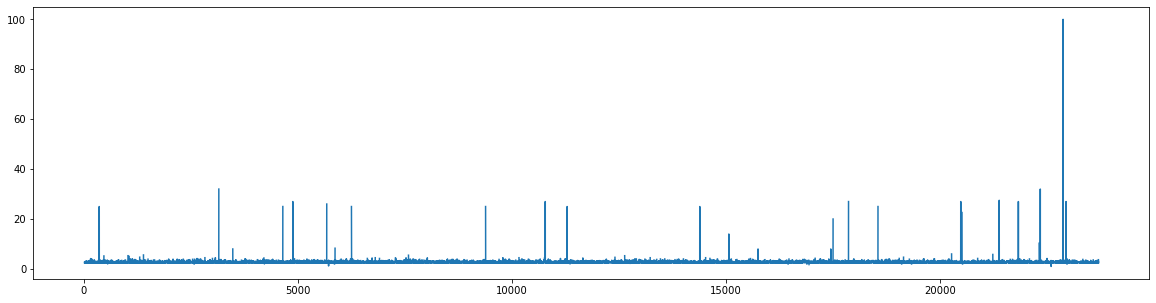

In [16]:
data['ceiling_height'].plot(figsize=(20, 5));

Итак, у нас есть значения, которые сильно выбиваются в высоту, и несколько значений, которые явно занижены.

Посчитаем пропуски в значениях потолков.

In [52]:
data['ceiling_height'].isna().sum()

8929

In [53]:
# Найдём медиану для каждой этажности.
ceiling_median = data.pivot_table(index='floors_total', values='ceiling_height', aggfunc=['median', 'count'])
ceiling_median.columns = ['median','count']

In [54]:
ceiling_median

,median,count
floors_total,,
1,2.80,10
2,2.70,202
3,2.80,390
4,3.00,754
5,2.55,3572
6,3.00,580
7,3.00,372
8,2.80,205
9,2.55,2498


In [55]:
# Найдём среднее для каждой этажности.
ceiling_mean = data.pivot_table(index='floors_total', values='ceiling_height', aggfunc=['mean', 'count'])
ceiling_mean.columns = ['mean','count']

In [56]:
ceiling_mean

,mean,count
floors_total,,
1,2.740000,10
2,3.009703,202
3,2.966462,390
4,2.981326,754
5,2.759362,3572
6,3.054517,580
7,2.933548,372
8,2.842537,205
9,2.598687,2498


Среднее значение и медиана совпадают, но есть проблема. На 37 этаже у нас высота 1.75, а на 33 значения нет. Для замены пустот буду использовать медиану. 

In [57]:
for floor in ceiling_median.index:
    data.loc[(data['ceiling_height'].isna()) & 
             (data['floors_total'] == floor), 
             'ceiling_height'] = ceiling_median.loc[floor, 'median']
    

В исторической застройке Петербурга высота потолков от 3.2 до 5 метров. В советской застройке 2.5-2.6 метра, в новых домах - до 3 метров. Нет смысла убирать такие значения, как 4.19 метра, поскольку это вполне может быть старый дом. Значения более 5 метров устраним. Также и значения ниже 2.5 метра. СНиП, по которому наименьшая высота потолков могла быть 2.5 метра, действовал некоторое время в советский период.

In [58]:
data['ceiling_height'].isna().sum()

1

In [59]:
data['ceiling_height'].dropna()

0        2.70
1        2.75
2        2.55
3        2.60
4        3.03
         ... 
23694    3.70
23695    2.55
23696    2.80
23697    3.00
23698    2.50
Name: ceiling_height, Length: 22908, dtype: float64

In [60]:
data = data[(data['ceiling_height'] >= 2.5) & (data['ceiling_height'] <= 5.0)]

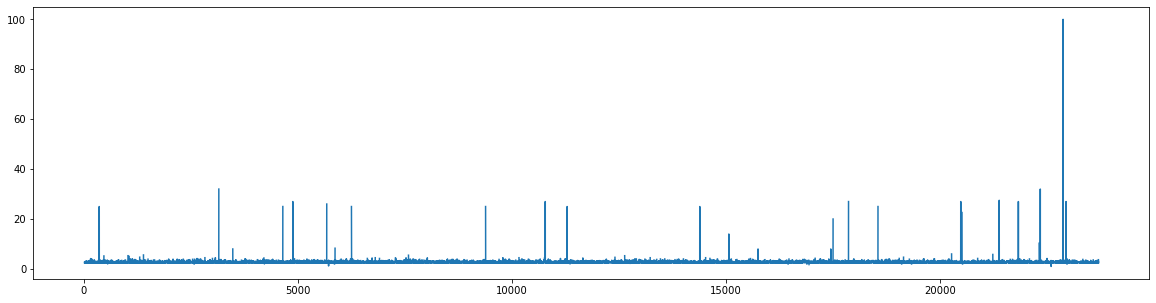

In [17]:
data['ceiling_height'].plot(figsize=(20, 5));

Так распределение смотрится гораздо правдивее. Основная масса до 3 метров, а пики вполне объяснимы квартирами в дореволюционных домах.

In [62]:
seventh_len = data.shape[0]
seventh_len

22806

In [63]:
data = data.drop_duplicates()

In [64]:
eightth_len = data.shape[0]
eightth_len

22806

Осталось **22806** значений после зачистки этажности, балконов, пустот в городах, высоты полотолков и числа комнат. Это **96.23%**. Достаточно много, чтобы продолжить зачистку. 

# Подитог 1 <a id='1'></a>

1. Я [убрал](#floors_ejection) ***выбросы по этажности*** домов на основании того факта, что максимальная этажность жилой недвижимости в Петербурге - 37 этажей. В Ленобласти это 28 этажей. Пытаться изменить данные на какие-то иные не особо целесообразно, так как процент ничтожен. 


2. Изначально в данных было 86 ***пропусков***, которые позднее превратились в 84 в процессе зачистки иных параметров. Можно было бы предположить, что указанные этажи по сути являются и последними, а потому этажность не была указана, но эта гипотеза не может быть проверена, а потому вряд ли имеет смысл приравнивать значения, спасая их. Я [удалил](#floors_drops) их.


3. Я привёл [значения](#cities) ***населённых пунктов*** к единому виду, убрав как лишние слова и символы, так и неявные дубли. 


4. Отработав по ***балконам***, [сократил](#balcony) их количество до адекватного - 3. Кроме того, заменил в оставшихся данных число балконов, превышающее число помещений, указав значение "1". Нельзя исключать, что я не прав, но это видится наиболее логичным. 


5. Заменил ***типы данных*** в [столбцах](#types) **апартаменты** `is_apartment` на `bool`; **дату** выставления объявления `first_day_exposition` на `datetime`; **балконы** `balcony` и **этажность** ([здесь](#floors_int)) `floors_total` на `int64`.


6. Переимновал [столбцы](#columns), которые требовали этого: `cityCenters_nearest`, `parks_around3000` и `ponds_around3000`.


7. Убрал [выбросы](#rooms) по ***комнатам***. Предполагаю, что элитная недвижимость нас пока не интересует.


8. Проработал ***высоту потолков***, [заменив](#ceil) пустые значения медианной высотой. Как мы помним, среднее значение и медиана были практически идентинчы.


In [65]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1819
floor                       0
is_apartment            20159
studio                      0
open_plan                   0
kitchen_area             2178
balcony                     0
locality_name               0
airports_nearest         5381
city_centers_nearest     5359
parks_around_3000        5358
parks_nearest           15118
ponds_around_3000        5358
ponds_nearest           14100
days_exposition          3004
dtype: int64

# Фронт работ: 

- Парки (факт и близость). Поскольку есть в задании, нельзя оставить без обработки. Требуется изучить расстояние. Однако вопрос в том, есть ли вообще парк рядом. Смею предположить, что нет, а потому везде, где пропуск в наличии парка поставим отсутствие парка. Если парк в наличии, но нет расстояния, заменим пустоту на медиану или среднее. 


- Аэропорт. Нужно изучить расстояние до а/п, но пустые значения не представляется возможным заменить. Как можно заменить их, не понимая, где вообще эта недвижимость находится. Ориентир в метрах от центра не является достаточным основанием, ибо даже сторону света не знаем, чтобы хотя бы прикинуть, что 4 км к северу от центра это примерно 20 км до аэропорта. Посему я оставляю эти данные без изменений.


- Расстояние до центра. То же самое, что с расстоянием до аэропорта. Где эта улица, где этот дом? Нереально.


- Апартаменты. Изменю на False. Почему? Потому что не отметили в 99% случаев именно потому, что это квартиры настоящие. 1%, я уверен, это всё же апартаменты, но вряд ли они сыграют большую роль. Всего пропусков по апартаментам - **20159**. Если 1% из этих данных - апартаменты, мы получим 202 апартамента, что от текущих данных составит всего **0.89%**. Кроме того, апартаменты не участвуют в исследовании и в принципе их можно не трогать. Посмотрим. Ведь "а вдруг?"


- Общая площадь. Не имеет пропусков. ***Проверим выбросы***, но, как я понимаю, все они закончились на многокомнатных квартирах.


- Жилая площадь имеет 1819 пропуска. Это много. Заменим, как и для площади кухни, медианами по категориям. Сделаю категории по общему метражу, для них рассчитаю медиану, а потом её уже передам пропускам. 


- Площадь кухни имеет 2178 пропуска. Решение выше.


- Дни размещения. Здесь есть большое желание поставить медиану. Будучи риелтором, я лично абсолютно против такой затеи, поскольку у каждого типа недвижимости есть свой средний срок продажи. Не исключаю, что есть разница по регионам, но в целом средний срок продажи квартиры по реальной рыночной цене - 2 месяца. Если верить данным DomClick (сервис Сбера), то в Петербурге средний срок продажи 62 дня. Проверим подсчётами.


- Цена объекта пропусков нет. Работы не требует. 


- Этаж квартиры не имеет пропусков. Выбросы уничтожены. Проверить на нули. 


- Тип этажа квартиры («первый», «последний», «другой»). Сделать через фунцкию и добавить в столб.


- Общее количество этажей в доме, подчищено. Инфа выше. 


- День и месяц публикации объявления. Пропусков нет, данные приведены к типу datetime. 


- Пруды. Не участвуют в исследовании, потому обрабатывать не стоит. Нет смысла тратить время. Но всё же приведём пропуски в значениях количества к нулям, их явно нет. А расстояния, если пруд указан, до медианы. Если внезапно потребуются какие-то исследования по этим данным, они уже будут готовы. 

- Смена типов данных для: 
 - цена, 
 - дни публикации, 
 - количество прудов и парков, 
 - расстояние до оных в метрах, 
 - расстояние до аэропорта.


#### Заменим пропуски в апартаментах 

По какой-то непонятной мне причине любые попытки замены приводили к тому, что все значения становились `True`. Единственное, что помогло - ввести новый столбец, заменив в нём пропуски на ноль, а потом уже нули на значение `False`. И потом заменить столбец `'is_apartment'` заменить новым. Решение не красивое, не лаконичное, но в силу ограниченности времени решил пока не доискиваться причин. Понимаю, что где-то ошибся, но пока не нашёл ошибку. <a id='apart'></a>

In [66]:
# Создание нового столбца, где все пустоты примут нулевые значения
data['is_ap'] = data['is_apartment'].fillna(0)

# Цикл для замены нулей на False
for flats in data['is_ap'].unique():
    data.loc[(data['is_ap'] == flats) & (data['is_apartment'] == 0), 'is_ap'] = \
    data.loc[(data['is_ap'] == flats), 'is_ap'] = False
    

In [67]:
# Замена исходного столбца апартаментов на вновь созданный и обработанный
data['is_apartment'] = data['is_apartment'].fillna(data['is_ap'])

Тип сменился автоматически.

#### Замена пустот в кухнях и жилой площади

##### Начнём с кухонь. Менять будем на медианное значение. <a id='kitchen'></a>

In [68]:
for kitchen in data['kitchen_area'].unique():
    data.loc[(data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['kitchen_area'] == kitchen), 'kitchen_area'].median()

##### Теперь жилая площадь <a id='living'></a>

In [69]:
for living in data['living_area'].unique():
    data.loc[(data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['living_area'] == living), 'living_area'].median()

In [70]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5381
city_centers_nearest     5359
parks_around_3000        5358
parks_nearest           15118
ponds_around_3000        5358
ponds_nearest           14100
days_exposition          3004
is_ap                       0
dtype: int64

In [71]:
data['total_area'].describe()

count    22806.000000
mean        58.428441
std         29.896164
min         12.000000
25%         40.000000
50%         51.000000
75%         68.000000
max        507.000000
Name: total_area, dtype: float64

Минимальная площадь 1-комнатной квартиры по СНиП - 28 квадратных метров. Сейчас есть масса студий размером до 20 метров общей площадью, но насколько всё это законно - вопрос. Плюс есть в продаже комнаты, есть малосемейки (они же "гостинки"). Оставлю в датафрейме квартиры, площадью от 20 квадратов. Потом рассмотрим жилую. Есть и 2 метра у нас. 

In [72]:
data.loc[data['total_area'] < 20]['total_area'].count()

27

27 квартир. Убираем! 

In [73]:
data = data.loc[data['total_area'] >= 20]

In [74]:
data['total_area'].describe()

count    22779.000000
mean        58.478012
std         29.879064
min         20.000000
25%         40.000000
50%         51.000000
75%         68.000000
max        507.000000
Name: total_area, dtype: float64

507 метров кажется выбросом. Хотя такие квартиры по сути есть. Как и квартиры в 200-300 метров. Однако стоит ли их оставлять? Поступим так. Всё, что выше 200 метров и имеет жилую площадь меньше 100 метров, удалим. Это мало похоже на правду. 

In [75]:
data[data['total_area'] > 300]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,is_ap
155,8,96000000.0,317.00,2017-07-07,4,3.50,3,183.0,3,False,...,1,Санкт-Петербург,22673.0,1771.0,2.0,508.0,3.0,366.0,62.0,False
793,20,135000000.0,310.00,2018-05-22,4,3.30,5,250.0,2,False,...,0,Санкт-Петербург,34159.0,7251.0,2.0,295.0,3.0,190.0,342.0,False
1085,16,75000000.0,323.00,2017-07-10,5,4.00,5,255.7,4,False,...,0,Санкт-Петербург,23713.0,594.0,3.0,398.0,2.0,515.0,259.0,False
2243,9,130278280.0,304.00,2015-07-24,5,3.11,9,51.0,7,False,...,0,Санкт-Петербург,25593.0,5913.0,2.0,164.0,0.0,NaN,599.0,False
3676,12,28789000.0,441.98,2019-01-23,4,3.00,6,51.0,6,False,...,0,Санкт-Петербург,20552.0,5181.0,0.0,NaN,0.0,NaN,NaN,False
6183,10,84382000.0,363.10,2018-10-07,3,2.70,16,51.0,12,False,...,0,Санкт-Петербург,31887.0,4979.0,0.0,NaN,2.0,182.0,NaN,False
6221,8,34000000.0,470.30,2018-01-14,4,2.80,3,248.7,3,False,...,0,Санкт-Петербург,43756.0,15459.0,1.0,852.0,3.0,122.0,179.0,False
6621,20,99000000.0,488.00,2017-04-09,5,2.95,20,216.0,17,False,...,0,Санкт-Петербург,27641.0,4598.0,1.0,646.0,1.0,368.0,351.0,False
7543,20,130000000.0,307.80,2016-04-24,5,3.00,4,187.9,3,False,...,0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,1094.0,False
7664,20,40000000.0,315.00,2017-04-20,5,3.50,6,182.0,4,False,...,0,Санкт-Петербург,22526.0,3175.0,1.0,1028.0,1.0,399.0,81.0,False


Например, здесь вы видим общую площадь в размере 441.98 кв. м, а жилая при этом - 51.0 кв. м. И это не единственное значение. 

Это явная бессмыслица. Тем паче, для 4-комнатной квартиры. Для индивидуального дома вполне подходит, но для квартиры, пусть и не особо типовой, нет. Огромные суммы не станут тратить за комнатушки в 12-13 метров. Потому я удалю все значения, которые имеют более 200 метров общей площади, но менее 100 метров жилой. 

In [76]:
data[(data['total_area'] > 200) & (data['living_area'] < 100)]['living_area'].count()

34

Таких значений всего 34. Думаю, что общая площадь в 300 квадратов при жилой в 100 вполне адекватна. Как и 500. Тут уже дело в не размере и числе комнат, а в помещениях, которые не считают жилыми. Но метраж менее 100 метров всё же выброс. 

In [77]:
data = data.loc[~((data['total_area'] <= 200) & (data['living_area'] >= 100))]

In [78]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,is_ap
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,False
1,7,3350000.0,40.40,2018-12-04,1,2.75,11,18.6,1,False,...,1,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,False
2,10,5196000.0,56.00,2015-08-20,2,2.55,5,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,False
3,0,64900000.0,159.00,2015-07-24,3,2.60,14,51.0,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,False
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,False
23695,14,3100000.0,59.00,2018-01-15,3,2.55,5,38.0,4,False,...,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,False
23696,18,2500000.0,56.70,2018-02-11,2,2.80,3,29.7,1,False,...,0,Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,51.0,12,False,...,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,False


Теперь жилая площадь.

In [79]:
data['living_area'].describe()

count    22657.000000
mean        34.245527
std         17.484468
min          2.000000
25%         19.000000
50%         31.000000
75%         45.000000
max        301.500000
Name: living_area, dtype: float64

In [80]:
data.loc[data['living_area'] < 20]['living_area'].count()

6146

Минимальная площадь для жизни - 2 метра. Видимо, там живёт Папа Карло. Оставлю минималку не ниже 14 метров. 2 квадрата на санузел и 4 на кухню в квартире-малютке вполне годится. Посчитаем, как много квартир с жилой площадью ниже 14 метров. 

In [81]:
data.loc[data['living_area'] < 14]['living_area'].count()

303

303 квартиры. Много. Но убираем. 

In [82]:
data = data.loc[data['living_area'] >= 14]

In [83]:
data['living_area'].describe()

count    22354.000000
mean        34.549721
std         17.403500
min         14.000000
25%         19.100000
50%         31.000000
75%         45.000000
max        301.500000
Name: living_area, dtype: float64

На всякий случай проверим кухню. Мало ли.

In [84]:
data['kitchen_area'].describe()

count    22354.000000
mean        11.714248
std          6.784615
min          1.300000
25%          7.200000
50%          9.800000
75%         13.000000
max        100.700000
Name: kitchen_area, dtype: float64

Ну, как и ожидалось - 1 метр. Что ж, исходя из срезов выше, придётся оставить кухни от 4 метров. Хотя это просто "гостинки" какие-то. Или студии маломерки. Как их много? 

In [85]:
data.loc[data['kitchen_area'] < 4]['kitchen_area'].count()

23

Целых 23 квартиры на вылет. Но нельзя же оставлять такие значения. Всю картину портят.

In [86]:
data = data.loc[data['kitchen_area'] >= 4]

In [87]:
data['kitchen_area'].describe()

count    22331.000000
mean        11.723380
std          6.782095
min          4.000000
25%          7.200000
50%          9.800000
75%         13.000000
max        100.700000
Name: kitchen_area, dtype: float64

In [88]:
data.loc[data['kitchen_area'] > 50]['kitchen_area'].count()

33

А ещё 34 кухни больше 50 метров. Почему 50? Потому что есть кухни-столовые и их площадь примерно равна 38-52 метрам. Бывают и аномалии типа 100 метров, как показано выше в дескрайбе, но это, скорее редчайшее исключение. Возможно, сочетание кухни со столовой, бильярдной, каминным залом. В общем, убираю. 

In [89]:
data = data.loc[data['kitchen_area'] <= 50]

In [90]:
data['kitchen_area'].describe()

count    22298.000000
mean        11.645484
std          6.457741
min          4.000000
25%          7.200000
50%          9.800000
75%         13.000000
max         50.000000
Name: kitchen_area, dtype: float64

#### Убираем пропуски в прудах и парках, а также расстояниях

##### Пруды. Пропуск равен нулю. <a id='ponds'></a>

In [91]:
for pound in data['ponds_around_3000'].unique():
    data.loc[(data['ponds_around_3000'].isna()), 'ponds_around_3000'] = 0
    
data['ponds_around_3000'].isna().sum()

0

##### Есть ли в пропусках **расстояний** то, что можно было бы заменить?

In [92]:
data['ponds_nearest'].isna().sum()

13852

In [93]:
data.loc[data['ponds_around_3000'] == 0]['ponds_around_3000'].count()

13852

Заменять нечего. Все пустоты по сути там, где ноль прудов. Логично. По-хорошему эти строки заменить на нули или "Нет пруда рядом". Да и в анализе они не нужны.

In [94]:
for pound_n in data['ponds_nearest'].unique():
    data.loc[(data['ponds_nearest'].isna()), 'ponds_nearest'] = 10000
    
# 10000 потому, что любой текст превратит тип в object, чего нам не требуется совершенно.
# Если поставить ноль, то можно попутать с ближайшими прудами, 
# кои действительно есть чуть ли не во дворах некоторой недвижимости.

##### Теперь парки. Они нам нужны, есть в исследовании <a id='parks'></a>

In [95]:
for park in data['parks_around_3000'].unique():
    data.loc[(data['parks_around_3000'].isna()), 'parks_around_3000'] = 0
    
data['parks_around_3000'].isna().sum()

0

А что с расстояниями? 

In [96]:
data.loc[data['parks_around_3000'] == 0]['parks_around_3000'].count()


14817

In [97]:
data['parks_nearest'].isna().sum()

14813

Картина та же, что с прудами. 

In [98]:
for park_n in data['parks_nearest'].unique():
    data.loc[(data['parks_nearest'].isna()), 'parks_nearest'] = 10000
    
# 10000 потому, что любой текст превратит тип в object, чего нам не требуется совершенно.
# Если поставить ноль, то можно попутать с ближайшими парками, 
# выход в которые порой буквально в 5 метрах от подъезда

In [99]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5279
city_centers_nearest    5257
parks_around_3000          0
parks_nearest              0
ponds_around_3000          0
ponds_nearest              0
days_exposition         2934
is_ap                      0
dtype: int64

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22298 entries, 0 to 23697
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22298 non-null  int64         
 1   last_price            22298 non-null  float64       
 2   total_area            22298 non-null  float64       
 3   first_day_exposition  22298 non-null  datetime64[ns]
 4   rooms                 22298 non-null  int64         
 5   ceiling_height        22298 non-null  float64       
 6   floors_total          22298 non-null  int64         
 7   living_area           22298 non-null  float64       
 8   floor                 22298 non-null  int64         
 9   is_apartment          22298 non-null  bool          
 10  studio                22298 non-null  bool          
 11  open_plan             22298 non-null  bool          
 12  kitchen_area          22298 non-null  float64       
 13  balcony         

Осталось поменять типы некоторых столбцов: цена, количество прудов и парков, расстояние до оных в метрах. Изменить тип данных в днях публикации и расстоянии до аэропорта не представляется возможным на данный момент из-за пропусков

In [101]:
# Меняем тип на целочисленный. 
data['ponds_around_3000'] = data['ponds_around_3000'].astype(int)
data['parks_around_3000'] = data['parks_around_3000'].astype(int)
data['parks_nearest'] = data['parks_nearest'].astype(int)
data['ponds_nearest'] = data['ponds_nearest'].astype(int)


data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22298 entries, 0 to 23697
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22298 non-null  int64         
 1   last_price            22298 non-null  float64       
 2   total_area            22298 non-null  float64       
 3   first_day_exposition  22298 non-null  datetime64[ns]
 4   rooms                 22298 non-null  int64         
 5   ceiling_height        22298 non-null  float64       
 6   floors_total          22298 non-null  int64         
 7   living_area           22298 non-null  float64       
 8   floor                 22298 non-null  int64         
 9   is_apartment          22298 non-null  bool          
 10  studio                22298 non-null  bool          
 11  open_plan             22298 non-null  bool          
 12  kitchen_area          22298 non-null  float64       
 13  balcony         

Приведём цены к тысячам рублей от миллионов и к типу `int`. <a id='tysrub'></a>

In [102]:
data['last_price'] = data['last_price'] / 1000
data['last_price'] = data['last_price'].astype(int)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,is_ap
0,20,13000,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1,482,2,755,NaN,False
1,7,3350,40.40,2018-12-04,1,2.75,11,18.6,1,False,...,1,Шушары,12817.0,18603.0,0,10000,0,10000,81.0,False
2,10,5196,56.00,2015-08-20,2,2.55,5,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1,90,2,574,558.0,False
3,0,64900,159.00,2015-07-24,3,2.60,14,51.0,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2,84,3,234,424.0,False
4,2,10000,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2,112,1,48,121.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600,62.40,2016-08-05,3,2.60,9,40.0,8,False,...,0,Петергоф,45602.0,34104.0,1,352,1,675,239.0,False
23694,9,9700,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,0,Санкт-Петербург,24665.0,4232.0,1,796,3,381,NaN,False
23695,14,3100,59.00,2018-01-15,3,2.55,5,38.0,4,False,...,0,Тосно,NaN,NaN,0,10000,0,10000,45.0,False
23696,18,2500,56.70,2018-02-11,2,2.80,3,29.7,1,False,...,0,Рождествено,NaN,NaN,0,10000,0,10000,NaN,False


# Подитог 2 <a id='2'></a>

1. Отработал [парки](#parks). Все пустоты заменил нулями. Пустые расстояния до парков были именно в пустотах по числу парков. Причина проста: нет парка, человек не отмечает. Ни наличие, ни расстояние.


2. Апартаменты. [Изменил](#apart) на False. Почему? Потому что не отметили в 99% случаев именно потому, что это квартиры настоящие. 1%, я уверен, это всё же апартаменты, но вряд ли они сыграют большую роль. Всего пропусков по апартаментам - 20159. Если 1% из этих данных - апартаменты, мы получим 202 апартамента, что от текущих данных составит всего 0.89%. Кроме того, апартаменты не участвуют в исследовании и в принципе их можно не трогать. Посмотрим. Ведь "а вдруг?"


3. Жилая площадь имеет 1819 пропуска. Это много. [Заменил](#living) её на медиану. 


4. Площадь кухни имеет 2178 пропуска. Решение выше. [Заменил](#kitchen) её на медиану. 


5. Дни размещения. Не трогал. Продажи могут быть как быстрыми, так и обычными, длинными. Абсолютно любыми. И гадать, подставляя на место пропусков значения как средние, так и медианные, считаю не особо этичным. У нас есть 96.23% данных от начального уровня. С учётом пропусков по срокам размещения у нас от текущих данных нет 13.17%, однако даже 86.82% данных хватит для того, чтобы сделать достаточно верные выводы. 

*Если бы я умел, то написал бы плотные фильтры, чтобы по ним усреднить значения, но вряд ли сейчас это мне про силам. Предположительно сделал бы категоризацию так. Нас. пункт, число комнат, метраж, стоимость 1 метра для создания категорий. По ним сроки  продажи, и потом по ним бы и подставил. Но не уверен, что это будет верным. Есть ощущение, что всё равно это даст слишком приблизительные значения*. 


6. Цена объекта пропусков нет. [Поменял](#tysrub) значения на "тыс. руб.", привёл к `int`.


7. Общее количество этажей в доме, подчищено. Инфа выше.


8. Пруды. Не участвуют в исследовании. Однако пустоты заменил на нули, а пропуски в расстояниях соответствуют нулям. 


9. Смена типов данных для: 
- количество прудов и парков,
- расстояние до оных в метрах.

**В прудах и парках расстояния в пустотах поставил 10000. Это позволило не менять формат на `object` и оставить данные годными для расчётов**.


### Посчитайте и добавьте в таблицу новые столбцы

Подсчитаем цену квадратного метра. Это делается путём деления стоимости объекта на значение общей площади. 

In [104]:
# Cделаем столбец просто делением. Плюс округлим до 2 знаков после запятой.
data['price_per_metre'] = (data['last_price'] / data['total_area']).round(2)

Посмотрим на столбец с ценой за метр. <a id='ppm'></a>

In [105]:
data['price_per_metre']

0        120.37
1         82.92
2         92.79
3        408.18
4        100.00
          ...  
23693     73.72
23694     72.49
23695     52.54
23696     44.09
23697    149.51
Name: price_per_metre, Length: 22298, dtype: float64

Добавим день публицкации. Для этого используем код `dt.weekday`. То же сделаем для месяца и года - `dt.month`, `dt.year`. Три столба. <a id='wmy'></a>

In [106]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22298 entries, 0 to 23697
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22298 non-null  int64         
 1   last_price            22298 non-null  int64         
 2   total_area            22298 non-null  float64       
 3   first_day_exposition  22298 non-null  datetime64[ns]
 4   rooms                 22298 non-null  int64         
 5   ceiling_height        22298 non-null  float64       
 6   floors_total          22298 non-null  int64         
 7   living_area           22298 non-null  float64       
 8   floor                 22298 non-null  int64         
 9   is_apartment          22298 non-null  bool          
 10  studio                22298 non-null  bool          
 11  open_plan             22298 non-null  bool          
 12  kitchen_area          22298 non-null  float64       
 13  balcony         

А теперь к категориям по этажам: первый, другой и последний. 

*От себя:* 
Я бы разбил на категории иначе. 
1. Это дома старые, до 3-4 этажей. 
2. Пятиэтажки. 
3. От 9 до 14 этажей. 
4. До 18 этажей. 
5. Свыше 18 этажей. 

Ну да ладно, пока этого нет в задании. <a id='category_floors'></a>

In [108]:
# Функция для создания трёх категорий
def categorize_floor(row):
    try:
        if row[8] == 1: # Условие проверки этажа, равен ли он единице (8 - индекс столба с этажами)
            return 'Первый этаж' # возвращаем строку категории
        elif row[8] == row[6]: # Условие проверки этажа, равен ли он этажности (6 - индекс этажности)
            return 'Последний этаж' # если этаж равен этажности, то это последний этаж
        # в любом ином случае 
        else: 
            return 'Не крайний этаж' # возвращаем значение, что это не крайний этаж
    except:
        print("Что-то не работает, проверь код") # То, что я надеюсь не увидеть
    
data['floor_category'] = data.apply(categorize_floor, axis=1) # Добавим данные, возвращаемые функцией в созданный столбец

# Подсчитаем полученные значения
data['floor_category'].value_counts() 

Не крайний этаж    16373
Последний этаж      3128
Первый этаж         2797
Name: floor_category, dtype: int64

Осталось перевести метры в километры и округлить. <a id='center'></a>

In [109]:
data['city_centers_km'] = (data['city_centers_nearest'] / 1000).round()
data['city_centers_km'].value_counts()

12.0    1531
15.0    1502
13.0    1380
14.0    1229
16.0    1212
        ... 
61.0       1
60.0       1
45.0       1
55.0       1
62.0       1
Name: city_centers_km, Length: 61, dtype: int64

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22298 entries, 0 to 23697
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22298 non-null  int64         
 1   last_price            22298 non-null  int64         
 2   total_area            22298 non-null  float64       
 3   first_day_exposition  22298 non-null  datetime64[ns]
 4   rooms                 22298 non-null  int64         
 5   ceiling_height        22298 non-null  float64       
 6   floors_total          22298 non-null  int64         
 7   living_area           22298 non-null  float64       
 8   floor                 22298 non-null  int64         
 9   is_apartment          22298 non-null  bool          
 10  studio                22298 non-null  bool          
 11  open_plan             22298 non-null  bool          
 12  kitchen_area          22298 non-null  float64       
 13  balcony         

In [111]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,is_ap,price_per_metre,weekday,month,year,floor_category,city_centers_km
0,20,13000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755,NaN,False,120.37,3,3,2019,Не крайний этаж,16.0
1,7,3350,40.4,2018-12-04,1,2.75,11,18.6,1,False,...,0,10000,81.0,False,82.92,1,12,2018,Первый этаж,19.0
2,10,5196,56.0,2015-08-20,2,2.55,5,34.3,4,False,...,2,574,558.0,False,92.79,3,8,2015,Не крайний этаж,14.0
3,0,64900,159.0,2015-07-24,3,2.60,14,51.0,9,False,...,3,234,424.0,False,408.18,4,7,2015,Не крайний этаж,7.0
4,2,10000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48,121.0,False,100.00,1,6,2018,Не крайний этаж,8.0


Хочется менее громоздкую таблицу, которая заодно занимает меньше памяти. Я включил в неё те столбцы, которые мне должны понадобиться для исслеования. <a id='table'></a>

In [18]:
work_data = (
    data
    [
        [
            'locality_name',
            'last_price',
            'price_per_metre',
            'total_area',
            'living_area',
            'kitchen_area',
            'rooms',
            'floor',
            'floors_total',
            'floor_category',
            'ceiling_height',
            'parks_nearest',
            'city_centers_nearest',
            'city_centers_km',
            'airports_nearest',
            'weekday',
            'month',
            'year',
            'days_exposition',
            'first_day_exposition'
        ]
    ]
)
work_data.head()

KeyError: "['price_per_metre', 'floor_category', 'city_centers_nearest', 'city_centers_km', 'weekday', 'month', 'year'] not in index"

In [ ]:
work_data.info()

У меня осталось 22298 значений из 23699. То есть, я убрал 5.91% значений. Достаточно мало.

# Подитог 3 <a id='3'></a>

1. Я добавил в таблицу новые столбцы: [день, месяц, год](#wme) и цену [квадратного метра](#ppm).

2. Я создал [категории этажей](#category_floors): первый, последний и не крайний. 

3. Перевёл [метры в километры](#center) в расстоянии до центра и округлил их.

4. Перевёл цены в [тысячи рублей](#tysrub)

5. Создал [новую таблицу](#table) с меньшим числом столбцов. И сейчас, когда я пишу это после исследования, могу сказать, что забыл добавить в неё целых три столба, а потому в итоге объём занимаемой памяти с исправлением ошибки получился почти таким же, каким был в первой таблице. Однако так всё же лучше было рисовать общие гистограммы.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Этот раздел выполнен качественно
</div>

### Проведите исследовательский анализ данных

Посмотрю на новый датафрейм...

array([[<AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'price_per_metre'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'living_area'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'floors_total'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'city_centers_nearest'}>,
        <AxesSubplot:title={'center':'city_centers_km'}>],
       [<AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'weekday'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>,
        <AxesSubplot:title={'center':'first_day_exposition'}>,
        <Axes

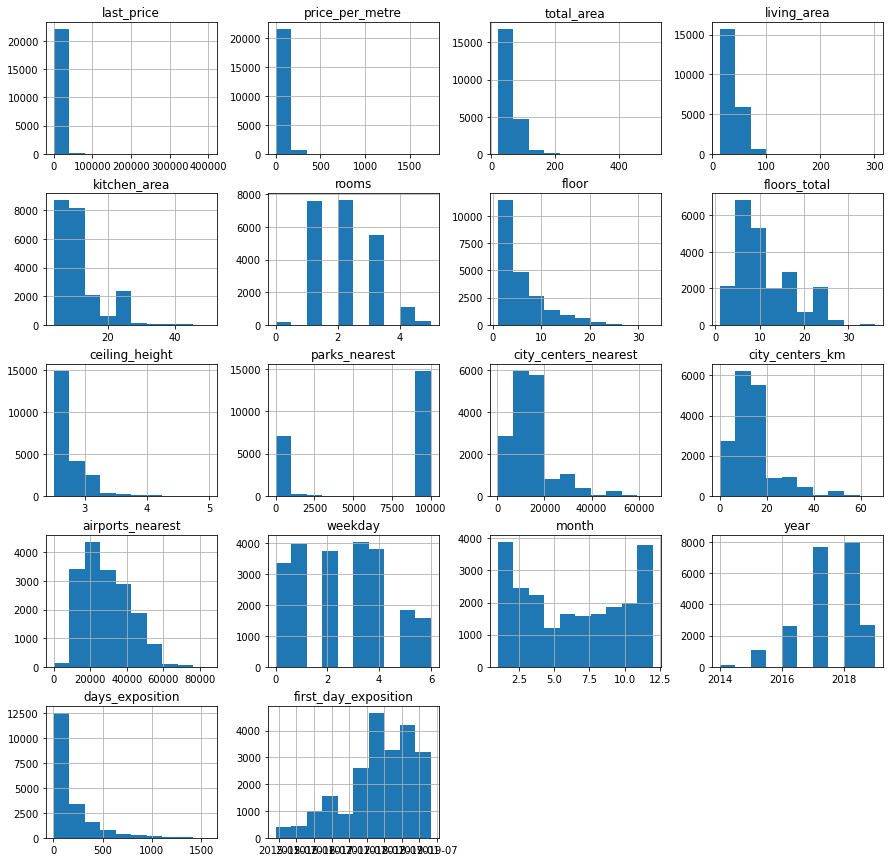

In [114]:
work_data.hist(figsize=(15, 15))

... и выведу уники новых значений: дня, месяца и года публикации

In [115]:
work_data['weekday'].unique()

array([3, 1, 4, 0, 2, 6, 5])

In [116]:
work_data['month'].unique()

array([ 3, 12,  8,  7,  6,  9,  4,  5,  2, 11,  1, 10])

In [117]:
work_data['year'].unique()

array([2019, 2018, 2015, 2017, 2016, 2014])

In [118]:
work_data['year'].value_counts()

2018    8032
2017    7681
2019    2713
2016    2637
2015    1106
2014     129
Name: year, dtype: int64

#### Исследуем общую площадь квартир

<a id='total_peeks'></a>

In [119]:
work_data['total_area'].describe()

count    22298.000000
mean        58.042251
std         28.511573
min         20.000000
25%         40.000000
50%         51.370000
75%         68.000000
max        507.000000
Name: total_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

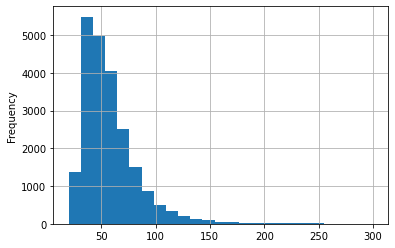

In [120]:
work_data['total_area'].plot(kind='hist', bins=25, range=(20, 300), grid=True)

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Я бы советовал сократить range и тогда мы сможем увидеть пиковые значения. 
</div>

**Общая площадь**. Как мы видим, среднее значение 58.04 кв. метра, медина же 51.37 кв. метра. Медиана более точная за счёт довольно большого выброса до 500 метров. Основная часть недвижимости обладает общей площадью от 30 до 70 метров с пиками на 30-45 метрах, 45-55 метрах (характерно для двушек брежневок и панелек 9- и 10-этажных), третья ступень от 55 до 60 метров и просевшие значения от примерно 60 до 70-75 метров. 

#### Исследуем жилую площадь квартир 

<a id='living_peeks'></a>

In [121]:
work_data['living_area'].describe()

count    22298.000000
mean        34.497137
std         17.232141
min         14.000000
25%         19.100000
50%         31.000000
75%         45.000000
max        301.500000
Name: living_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

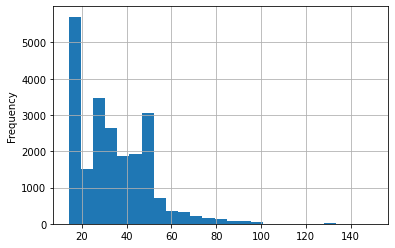

In [122]:
work_data['living_area'].plot(kind='hist', bins=25, range=(14, 150), grid=True)

In [123]:
work_data.loc[work_data['living_area'] < 20]['living_area'].count()

5831

**Жилая площадь**. Огромное число недвижимости, где жилая площадь меньше 20 метров - 5831. Это чуть больше четверти. Такой пик можно объяснить продажей комнат в коммуналках, небольших студий, и малосемеек ("гостинок"). При это выше мы видим пик большое число квартир с площадью от 20 метров с пиком в районе 30-45 метров, что характерно для хрущевок и брежневок (1- и 2-комнатные квартиры).

Минимальная площадь - 14 метров (это оставил я), но и первый квартиль идёт на 19.10 кв. м. Медиана даёт уже 31 кв. метр, что вполне коррелирует с медианой общей площади. Третий квартиль - 45 кв. м. То есть, основная масса недвижимости всё же достаточно не огромных размеров. Есть пики на площади 25-30 метров с понижением к 37. Это стандарт для однокомнатных квартир и двушек старого образца. Далее идёт пик на примерно 50 метрах. Он объясняется большим числом квартир с общей площадью свыше 80 метров. Здесь пик имеет значение в районе 3000 явлений. В то же время квартир, площадь которых более 80 метров тоже чуть более 3000. Цифра ниже подсчитана. 

In [124]:
work_data.loc[work_data['total_area'] > 80]['total_area'].count()

3163

#### Исследуем площадь кухонь

<a id='kitchen_peeks'></a>

In [125]:
work_data['kitchen_area'].describe()

count    22298.000000
mean        11.645484
std          6.457741
min          4.000000
25%          7.200000
50%          9.800000
75%         13.000000
max         50.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

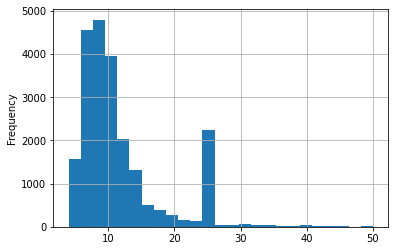

In [126]:
work_data['kitchen_area'].plot(kind='hist', bins=25, range=(4, 50), grid=True)

**Площадь кухни**. Начну с описания. Среднее значение - мечта всех хозяек до 2000 года: 11.5 метров (11.65 кв. м). Однако, если смотреть на минимум, квартили, медиану и график, среднее, скорее, обусловлено наличием кухонь до 50 метров, а ещё довольно большим выбросом в районе 25 метров на кухню. Медиана - 9.80 кв. м куда ближе к истинному среднему значению. И всё ещё остаётся мечтой многих хозяек в стране. :) 

О пиках. Первые пики обусловлены тем, что это основная масса жилья. Пик на 25 метров объяснить можно теми же квартирами от 80 метров, коих у нас насчитывается 3163 единицы. 

#### Цена объекта недвижимости. 
Хоть это и не требуется, но я также приведу цену за метр, так это довольно интересный показатель с сильным разбросом, как можно было заметить при создании стоолбца. <a id='prices'></a>

In [127]:
work_data['last_price'].describe()

count     22298.000000
mean       6069.359898
std        7703.111095
min          12.000000
25%        3400.000000
50%        4600.000000
75%        6600.000000
max      401300.000000
Name: last_price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

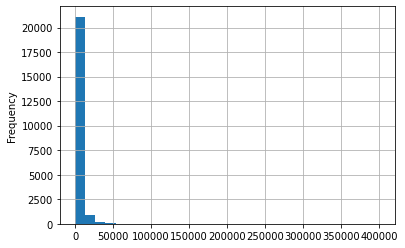

In [128]:
work_data['last_price'].plot(kind='hist', bins=30, range=(0, 400000), grid=True)

<AxesSubplot:ylabel='Frequency'>

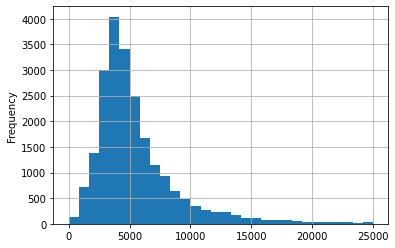

In [129]:
work_data['last_price'].plot(kind='hist', bins=30, range=(0, 25000), grid=True)

<AxesSubplot:ylabel='Frequency'>

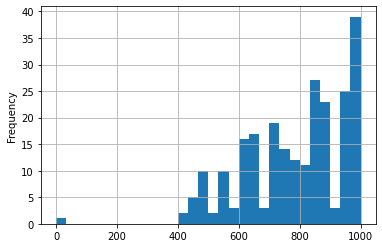

In [130]:
work_data['last_price'].plot(kind='hist', bins=30, range=(0, 1000), grid=True)

Из-за выбросов с ценами выше миллиарда (4 млдр), довольно сложно читать график. Потому построил ещё один до 25 млн рублей. Это основная часть неджвижимости, как это заметно на первом графике. И так эту основную часть прочитать удобнее. А ещё график с ценами до 1 млн рублей, чтобы исключить выбросы. Вряд ли цены от 400 тысяч можно назвать выбросами. Это стоимость жилья на довольно большом расстоянии от Петербурга


И всё же у нас есть выброс - 12 000 рублей. Это явно описка автора объявления. Шанс на единичную ошибку при копировании данных ничтожен.


Среднее значение стоимости 6 млн рублей, а медиана резко занижена - 4.6 млн рублей. Судя по второму графику, это действительно ближе к истинной средней цене. Разброс основного количества цен в районе 1 и 3 квартилей (3.4 - 6.6 млн), это заметно по графику 2. Причём по графику я склонен более к разбросу от 3.5 до 6.0 млн. 


Далее стоимость постепенно повышается до 103-105 млн, снижаясь по числу объектов, а затем и вовсе очень медленно растёт до 4 млрд.

In [131]:
work_data['price_per_metre'].describe()

count    22298.000000
mean        98.177266
std         46.323310
min          0.110000
25%         76.230000
50%         94.625000
75%        113.427500
max       1736.840000
Name: price_per_metre, dtype: float64

<a id='ppmet'></a>

<AxesSubplot:ylabel='Frequency'>

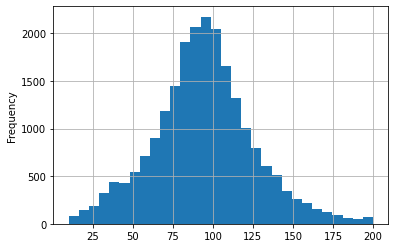

In [132]:
work_data['price_per_metre'].plot(kind='hist', bins=30, range=(10, 200), grid=True)

**Стоимость квадратного метра**. Здесь виден тот же выброс, где цена 12000 рублей за объект. Но зато разница между средним и медианным значениями почти незаметна: 98177 рублей против 94625 рублей за метр. Первый квартиль - 76 тысяч, третий - 113 тысяч. В то же время разброс по графику (я беру сейчас число наблюдений от 1000) примерно от 70 до 125 тысяч рублей (около 14000 наблюдейни) с пиковыми значениями в районе 78 - 105 тысяч рублей (около 8000 наблюдений). 

#### Изучение комнатности квартир

In [133]:
work_data['rooms'].describe()

count    22298.000000
mean         2.017894
std          0.955010
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

<a id='rooms_num'></a>

<AxesSubplot:ylabel='Frequency'>

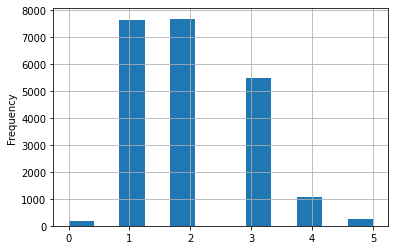

In [134]:
work_data['rooms'].plot(kind='hist', bins=12, range=(0, 5), grid=True)

По комнатам деление идёт между 1- и 2-комнатными квартирами. Их практически одинаковое количество: ~ 15500 на оба типа, по 7700 на каждый. Это 69.5% всех продаемых квартир. На втором месте идут 3-комнатные квартиры - 5500 значений и это 24.7% процента. Всего это 94% всей продаваемой недвижимости. 

Это стандарнтная картина. Чаще всего покупают жильё для съезда от родителей, для совместного проживания молодой семьи, при расширении семьи при рождении ребёнка. Причём рождение ребёнка не всегда играет роль в комнатности прирбретаемой недвижимости. Кто-то от родителей или из коммуналки уежает в 1-комнатную. Однако это не из исселедования, а опыта риелторской деятельности. 

Опыт же говорит, что "трёшки" менее востребованы за счёт своей дороговизны даже при наличии двух разнополых детей, что также видно на графике. Однако разница довольно несущественна, поскольку это Петербург, а он несколько отличается от средней статистики по стране. 

4-комнатные квартиры выставляются, как видно, не столь часто, 5-комнатные и того реже. 

Нулевые значения - студии, которые мы не стали зачищать. Их ничтожно мало и на общую картину они не влияют.

#### К высоте потолков

In [135]:
work_data['ceiling_height'].describe()

count    22298.000000
mean         2.700919
std          0.221421
min          2.500000
25%          2.550000
50%          2.650000
75%          2.750000
max          5.000000
Name: ceiling_height, dtype: float64

<a id='ceils'></a>

<AxesSubplot:ylabel='Frequency'>

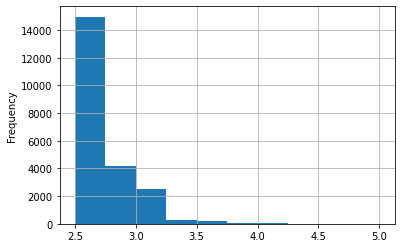

In [136]:
work_data['ceiling_height'].plot(kind='hist', range=(2.5, 5), grid=True)

Основная масса квартир имеет высоту потолка от 2.5 до 2.7 метров (~13000 наблюдений). Это классика и стандарт жилого фонда России. Однако с учётом того, что в Петербурге достаточно много жилья, которое было построено с иными представлениями о комфорте, мы видим и значения до 3 метров (чуть более 4000 квартир) и свыше 3 метров (до 3.2 м - в районе 2700 квартир). Остальные высоты крайне редки и не достойны упоминаний, их можно приравнять к выбросам. Впрочем, это около 10% от всех наблюдений, потому значения не были ранее удалены.


Среднее и медианное значения схожи: 2.7 метра против 2.65.

#### Этаж квартиры

In [137]:
work_data['floor'].describe()

count    22298.000000
mean         5.850525
std          4.844632
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<a id='floors_1'></a>

<AxesSubplot:ylabel='Frequency'>

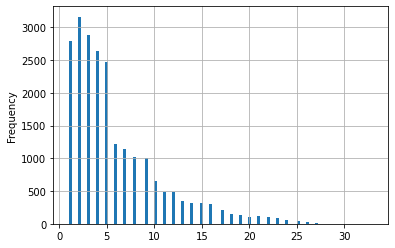

In [138]:
work_data['floor'].plot(kind='hist', bins=100, range=(1, 33), grid=True)

<AxesSubplot:ylabel='Frequency'>

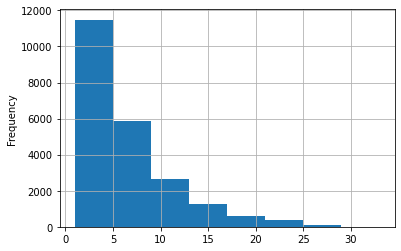

In [139]:
work_data['floor'].plot(kind='hist', bins=8, range=(1, 33), grid=True)

Наблюдаем ярко выраженное преобладание первых пяти этажей. Примерно половина всех значений. Я специально разбил на 100 корзин, чтобы чётче выделить этаж. 

Среднее (5.85, то есть, 6 этаж) обусловлено тем, что у нас есть и 33 этажа, а вот медиана равна 4, что довольно заметно на графике. Первый квартиль на 2 этаже, что также хорошо видно на графике, третий - на 8 этаже. По графику уже не особо заметно. 

Сам график даёт представление о том, что более половины недвижимости продаётся именно первых пяти этажах. Связано ли это с тем, что дома пятиэтажные - вопрос, ответ на который мы получим ниже. И, безусловно, какая-то часть продаётся в высотках.

Ещё примерно 26.5% квартир находятся на этажах с 6 по 9. Без взаимосвязи с этажностью говорить рано, но в принципе похоже на то, что в основом люди продают эти этажи в домах этажности до 9-10. Конечно, 9 этаж 22-этажного дома тоже есть, но судя по числу этажей, тренд, скорее именно в том, что дома до 9 этажей. 

В районе ближе к 3000 значений мы видим этажи с 9 по 13, если брать более детально, то на 9 этаж приходится 1000 квартир. И это говорит в пользу выше высказанной гипотезы об этажности домов.  

#### Этажность дома

Вообще сначала тип этажа идёт по плану, но привязка этажа к этажности несколько важнее показалась. Если надо, исправлю.

In [140]:
work_data['floors_total'].describe()

count    22298.000000
mean        10.663288
std          6.566211
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

<a id='floors_2'></a>

<AxesSubplot:ylabel='Frequency'>

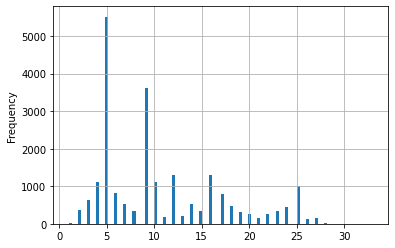

In [141]:
work_data['floors_total'].plot(kind='hist', bins=100, range=(1, 33), grid=True)

<AxesSubplot:ylabel='Frequency'>

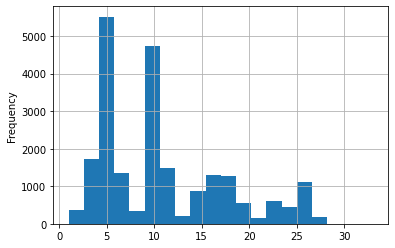

In [142]:
work_data['floors_total'].plot(kind='hist', bins=20, range=(1, 33), grid=True)

Что ж, гипотеза о пиках этажей в продаже подтверждается. Пятиэтажки и девятиэтажки у нас занимают почти 8000 домов. При этом ещё есть дома в 1, 2, 3 и прочее число этажей до 9. Есть пик на 12 этажей. Такие дома не очень характерны для глубокой провинции с полумилионным населением, но вполне часто встречаются в больших городах. Пик на 16 этажах. Таких домов достаточно много по всей стране. Что-то типа 17-18 этажей, что тоже встречается часто, и 25 этажей, которые с недавних пор стали вполне себе эталоном. 

Меня несколько смущает иная этажность. Например, 13 или 17 этажей. Я не встречал такие дома, а потому мне кажется это ошибкой при заполнении объявления. С другой стороны, недвижимость Петербурга я не изучал, потому нельзя считать данные ошибкой. 

Среднее значение - 10 этажей, медиана на 9 этажах. Первый и третий квартили - 5 и 16 этажи. Максимальный этаж - 36. По всей видимости, 37-этажный дом был удалён во время великой чистки.

#### Тип этажа

In [143]:
work_data['floor_category'].value_counts()

Не крайний этаж    16373
Последний этаж      3128
Первый этаж         2797
Name: floor_category, dtype: int64

<a id='floors_3'></a>

<AxesSubplot:>

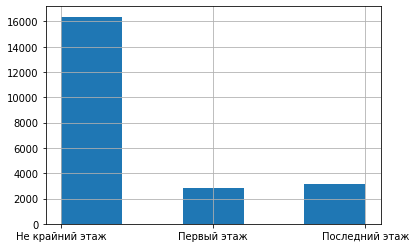

In [144]:
work_data['floor_category'].hist(bins=5, grid=True)

У нас есть 14.03% квартир на последних этажах, 12.54% на первых этажах. Соответственно, этажи "средние" у нас взяли 73.43%. Почему так? Потому что не крайних этажей огромное количество в сравнении с крайними. Если провести анализ по этажам, то вполне себе видно, что продаётся всё. 

Как пример, приведу нижеследующее: 

In [145]:
work_data.loc[(work_data['floors_total'] == 9) & (work_data['floor'] < 9)]['floors_total'].count()

3250

То есть, в девятиэтажках продаётся 3250 квартир с 1 по 8 этажи включительно. Было бы странно, видеть иное, так как на этаже всё же ограниченное число квартир.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Полученные данные соответствуют реалиям
</div>

#### Расстояние до центра города в метрах

In [146]:
work_data['city_centers_nearest'].describe()

count    17041.000000
mean     14310.375976
std       8584.333402
min        208.000000
25%       9496.000000
50%      13168.000000
75%      16316.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

<a id='center_1'></a>

<AxesSubplot:ylabel='Frequency'>

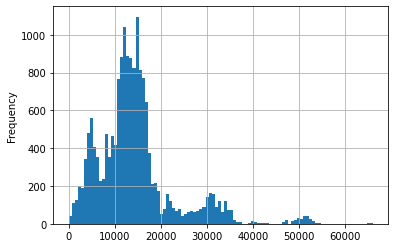

In [147]:
work_data['city_centers_nearest'].plot(kind='hist', bins=100, range=(0, 66000),grid=True)

<AxesSubplot:ylabel='Frequency'>

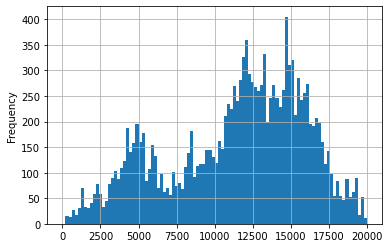

In [148]:
work_data['city_centers_nearest'].plot(kind='hist', bins=100, range=(0, 20000),grid=True)

<AxesSubplot:ylabel='Frequency'>

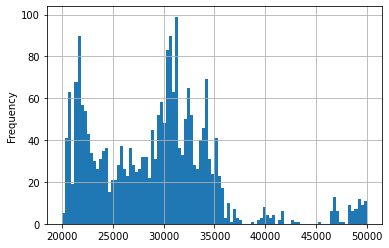

In [149]:
work_data['city_centers_nearest'].plot(kind='hist', bins=100, range=(20001, 50000),grid=True)

Расстояние до центра города. Как я понимаю, расстояние до центра писали в основном, учитывая центр Петербурга. А если не писали, то либо не знали, либо не имели понятия о том, до центра чего считать расстояние - Петербурга или родного Колпино. Судя по расстояниям свыше 30 км, именно до центра С.-Пб. писали данные. Хотя, конечно, в самом начале стоило проверить это по именам наспунктов. 

К расстояниям. Преобладают расстояния в районе 5 км от центра и примерно от 10 до 17 км до центра. Отдельные пики на 5 и примерно 12, 13 и почти 15 километрах. Именно большие такие пики при весьма плотной закраске. Предполагаю, что это связано с расположением спальных районов Петербурга и присоединённых территорий. Именно потому такие выбросы. 

Расстояния свыше 20000 метров тоже имеют свои пики. В районе 20.5 и 22 км, ещё больш**и**е пики на 30-32 км от Петербурга. Есть выбросы на 33-34 км, чуть меньше на 35 км. 

Учитывая основные окружающие Петербург пункты, могу предплоложить, что есть и доля ошибок, когда вместо 3500 метров писали 35000 или не 3.5 км, а 35. Однако перечень населённых пунктов говорит о том, что расстояния есть и реальные. Более детально можно посмореть по связке их с расстояниями. Однако стоит учесть, что по расстояниям у нас данные всего в 76.42% от общего числа записей. По всей видидмости, далеко не все знают расстояния или эти люди просто поленились вбить данные.

Среднее значение - 14.3 км, медианное - 13.2 км. С учётом разброса разница не большая. Минимальное расстояние 208 метров, максимум - 65 км, квартили на 9 и 16 км от центра. Основной разброс по графику от почти нуля до 20 км с проседаниями в районе 2.5 км и 6.8-7 км. Чем обусловлены проседания сложно сказать, не зная рынка. Специалисты могут указать, что на тех расстояниях наличиствует много административных зданий и мало жилого фонда, либо некие супер элитные ЖК, в которых продажи редкое явление. 

Плюс, что немаловажно, мнение о центре у всех разное. Для кого-то это Дворцовая площадь, а для кого-то уже и Обводной канал (3 км от Дворцовой) или хотя бы Фонтанка (2 км от Дворцовой).

#### Расстояние до аэропорта

In [150]:
work_data['airports_nearest'].describe()

count    17019.000000
mean     28803.453728
std      12673.847857
min          0.000000
25%      18459.000000
50%      26803.000000
75%      37364.000000
max      84869.000000
Name: airports_nearest, dtype: float64

<AxesSubplot:ylabel='Frequency'>

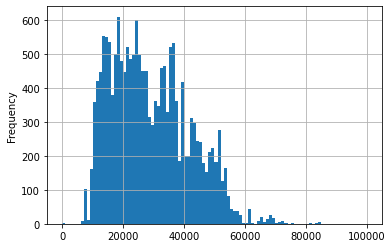

In [151]:
work_data['airports_nearest'].plot(kind='hist', bins=100, range=(0, 100000),grid=True)

<a id='aero'></a>

<AxesSubplot:ylabel='Frequency'>

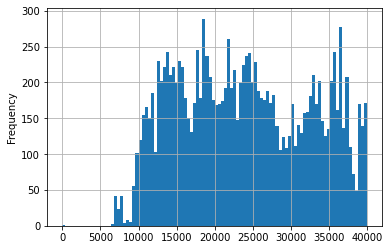

In [152]:
work_data['airports_nearest'].plot(kind='hist', bins=100, range=(0, 40000),grid=True)

Близость к аэропорту от 9 до 40 километров преобладает. С небольшим пиком в районе 7-8 тысяч метров и почти полным проседанием в районе 8-9 км. Отдельные пики можно объяснить тем же, чем пики до центра города - расположением спальных районов и ЖК. 

Среднее расстояние похоже на медианное с разнице в 2 км: 28803 пртив 26803 мемтров. Минимальное значение 0. Что, скорее всего, ошибка заполнения. Об этом же говорит и код ниже. Единственное значение. 

Квартили на 18.5 и 37.5 км. Если учесть расстояние до центра города в примерно 16 км, то вполне адекватные значения.

Стоит отметить, что заполнение этих данных, к сожалению, не полное. Всего 76.33%. Почти столько же, сколько по расстоянию до центра. Тут тоже можно предположить, что эти люди либо не знали, либо поленились. Поскольку данные весьма похожи, нельзя исключать и технологический фактор. 

In [153]:
work_data.loc[work_data['airports_nearest'] == 0]['airports_nearest'].count()

1

#### Расстояние до парка

In [154]:
work_data['parks_nearest'].describe()

count    22298.000000
mean      6808.507759
std       4494.205033
min          1.000000
25%        611.000000
50%      10000.000000
75%      10000.000000
max      10000.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:ylabel='Frequency'>

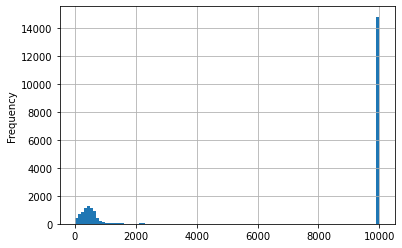

In [155]:
work_data['parks_nearest'].plot(kind='hist', bins=100, range=(0, 10000),grid=True)

Выброс на 10000 метрах - пустые значени, которые было обязательно нужно заполнить, так как программа не давала сменить тип данных. Скорее всего, это была ошибка с моей стороны.

<a id='parks_1'></a>

<AxesSubplot:ylabel='Frequency'>

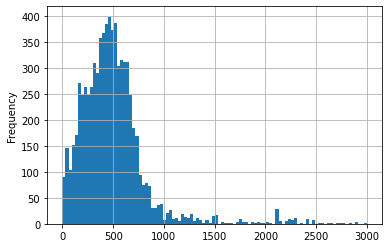

In [156]:
work_data['parks_nearest'].plot(kind='hist', bins=100, range=(0, 3000),grid=True)

Поскольку у нас изначально указаны пруды до 3000 метров, то именно это значение и возьмём для графика. Преобладают расстояния от почти у дома до 750 метров примерно. Это приятно для жителей и очень интересно. Потому как по сути более 14000 значений - нули. То есть, близостью к парку могут похвастаться далеко не все. Треть всех продавцов. 

Пустоты в расстоянии были связаны с пустотами в наличии парка. Я считаю, что это связано с отсутствием таковых, однако нельзя исключать и технический фактор.

#### День и месяц публикации

Я не стал объединять данные для графиков, но проведу изучение в одном пункте. <a id='d'></a>

<AxesSubplot:ylabel='Frequency'>

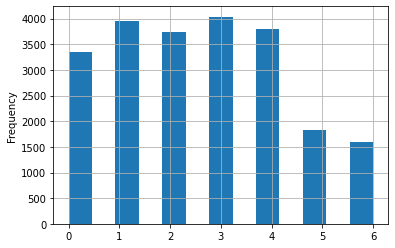

In [157]:
work_data['weekday'].plot(kind='hist', bins=13, range=(0, 6),grid=True)

<a id='mon'></a>

<AxesSubplot:ylabel='Frequency'>

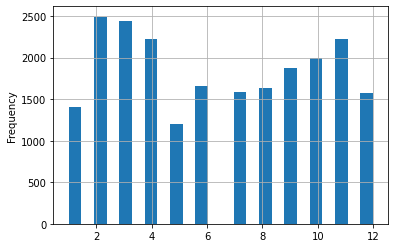

In [158]:
work_data['month'].plot(kind='hist', bins=24, range=(1, 12),grid=True)

В целом меньше публикаций в выходные дни. Больше всего во вторник и четверг. Очень близко к ним остальные дни рабочей недели. Обычно четверг связан с тем, что в этот день и в пятницу люди договавариваются о встречах на выходные. Второе место вторника не могу объяснить ничем, кроме того факта, что за выходные появляются новые объекты, которые вносят в базу АН в понедельник, а во вторник идёт маркетинг. Однако почти ровные показатели дают огромное зернище сомнения. 

Я бы сказал, единственная реальная зависимость - выходные. Почему не дают много объявлений? Выходные в АН, показы, размещают с работы. 

По месяцам зависимость яркая. Январь месяц глухой для продаж, и потому объявлений мало. Далее рост. Спад в мае объясним длительными праздниками и выездами, начало отпусков. То же летом. Однако довольно странно, что нет пика в сентябре. Обычно это пиковый месяц после отпусков. Постепенный рост наблюдается до ноября, где число объявлений примерно равно марту, а потом снова спад, так как декабрь не лучший месяц для серьёзных дел - предновогодняя суета. 

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

В мае не до продаж, все на огородах =)
</div>

#### Срок продажи квартир

In [159]:
work_data['days_exposition'].describe()

count    19364.000000
mean       179.767094
std        219.353762
min          1.000000
25%         44.000000
50%         94.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:ylabel='Frequency'>

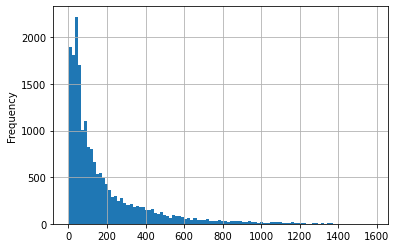

In [160]:
work_data['days_exposition'].plot(kind='hist', bins=100, range=(1, 1580),grid=True)

<a id='time'></a>

<AxesSubplot:ylabel='Frequency'>

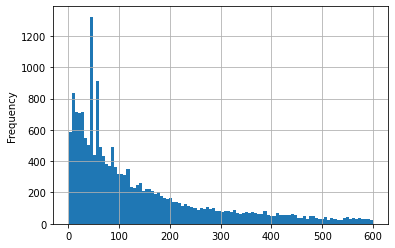

In [161]:
work_data['days_exposition'].plot(kind='hist', bins=100, range=(1, 600),grid=True)

<AxesSubplot:ylabel='Frequency'>

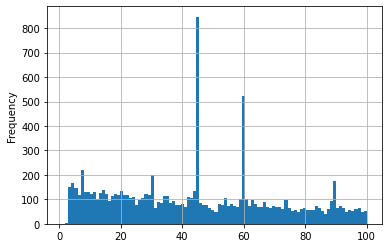

In [162]:
work_data['days_exposition'].plot(kind='hist', bins=100, range=(1, 100),grid=True)

In [163]:
work_data.loc[work_data['days_exposition'] <= 30]['days_exposition'].count()

3556

Срок публикации объявления имеет два ярких и три не ярких пика. Первые два это 45 и 60 дней. Зависят, по всей видимости, от того, какие были сроки публикации выбраны, а потом не продлены. Либо это некие платные услуги, после окончания которых публикации были сняты. 

Три пика: 7, 30 и 90 дней. Те же причины, что озвучены выше. Однако по всей видимости эти срок выбирали реже, а потом пики не столь высоки. 

Кроме того, публикация на короткое время может быть следствием 4 факторов:
1. Объявление дал собственник, которого потом взяло в работу агентство. Соответствнно, сам собственник объявление снял.
2. Обяъвление дано риелторами для проведения завышенной оценки под ипотеку. Такое случается, когда нет первоначального взноса или его не хватает. Тогда сумма продажи завышается, оценку делают в том числе по подставным квартирам, которых в продаже по сути нет.
3. Собственники решили прицениться к продаже: есть ли смысл, по какой цене. И объявление - пробный шар.
4. Объявление снято в связи со сменой планов на недвижимость.

**По условию задания мы считаем, что снятие публикации соответствует по сути продаже**. 
У нас 19364 объявлений, которые имеют данные о сроке публикации. Отсутствие данных - явно техническая ошибка или ошибка коллег, которые эти данные готовили. Итак, у нас 86.84% данных дают понятие о сроках. 
**Средний срок продажи**: 180 дней, то есть, шесть месяцев. Это очень много. 
**Минимальный срок продажи**: 1 день. Что в прицнипе реально примерно в одном случае на пару тысяч. *(Сам так продавал дважды, а в третий даже объявление не успел дать.)* Но скорее всего, тут просто снятие публикации или техническая ошибка.
**Первый квартиль** - 44 дня. Что вполне достоверно.
**Медиана** - 94 дня. Что уже гораздо ближе к реально среднему сроку. По данным Сбера сейчас в Петербурге средний срок продажи 62 дня. Однако стоит учитывать и тот факт, что данные для изучения до 2019 года включительно. Тогда средние сроки по адекватной рынку цене составляли 2-3 месяца.
**Третий квартиль** - 229 дней. Это очень долго, но тоже достоверно. Особенно, учитывая некоторые объекты в данных. Ведь есть и весьма специфические квартиры с заоблачной ценой. Такие не продаются быстро обычно. 
**Максимум** - 1580 дней. Здесь я вижу два варианта: особо сложный объект и просто ошибку при переносе данных. Как вариант, если на тот момент была возможность автопродления публикации, можно предположить, что пользователь его включил и забыл об объявлении. 

Объявлений, где срок размещения был **менее 30 дней** - 3556. Это довольно большое число. Можно ли сказать, что за это время продажа состоялась? Вряд ли. Обычно объявление снимают в двух случаях: при получении задатка или после совершения сделки. Чаще уже второе. А провести сделку в первый месяц после публикации можно лишь при условии наличных. Рынок же на 14.11.2022 год состоит на 86% из ипотеки, а это никак не 30 дней. Пусть в рассматриваемый период доля ипотеки была 60%. Даже эта цифра даёт право усомниться, что эти 3556 квартир были проданы в первые 30 дней за наличку. 

Однако от нас не требуется столь глубокого анализа, да и сами данные недостаточны для него.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

    
Эти аномалии очень похожи на техническую особенность самой платформы: вероятнее, в эти дни платформа автоматически убирает объявления, если пользователь его не продлил
</div>

In [164]:
work_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22298 entries, 0 to 23697
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   locality_name         22298 non-null  object        
 1   last_price            22298 non-null  int64         
 2   price_per_metre       22298 non-null  float64       
 3   total_area            22298 non-null  float64       
 4   living_area           22298 non-null  float64       
 5   kitchen_area          22298 non-null  float64       
 6   rooms                 22298 non-null  int64         
 7   floor                 22298 non-null  int64         
 8   floors_total          22298 non-null  int64         
 9   floor_category        22298 non-null  object        
 10  ceiling_height        22298 non-null  float64       
 11  parks_nearest         22298 non-null  int64         
 12  city_centers_nearest  17041 non-null  float64       
 13  city_centers_km 

#### Корреляция цены с площадью, комнатностью, этажом и датой публикации

<a id='corr'></a>

##### Корреляция цены и общей площади

In [165]:
work_data['last_price'].corr(work_data['total_area'])

0.666228379921184

Корреляция составляет 0.67. Этого вполне хватит, чтобы заявить о наличии некоторой небольшой, можно сказать "условной" зависимости. Однако зависимость должна быть выше. А её почему-то нет

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

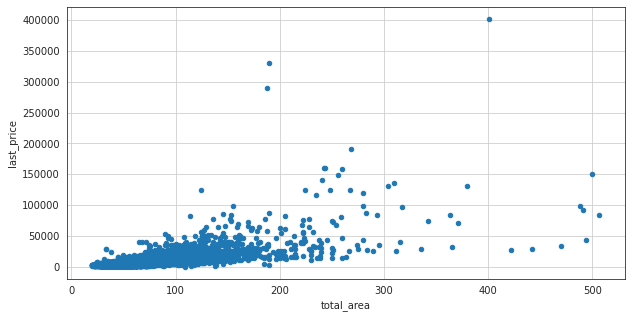

In [221]:
work_data.plot.scatter(y='last_price', x='total_area', grid=True, figsize=(10, 5))

##### Корреляция цены и жилой площади

In [166]:
work_data['last_price'].corr(work_data['living_area'])

0.5176852635850647

Зависимость цены от жилой площади меньше - 0.52. Это вполне нормально, поскольку люди покупают целое, а не часть.

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

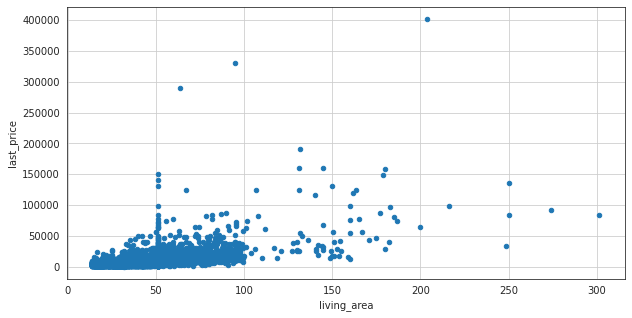

In [206]:
work_data.plot.scatter(y='last_price', x='living_area', grid=True, figsize=(10, 5))

##### Корреляция цены и площади кухни

In [167]:
work_data['last_price'].corr(work_data['kitchen_area'])

0.3281893592528296

Зависимость цены от площади кухни стремится к нулю, что вполне логично. Корреляция составляет 0.33

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

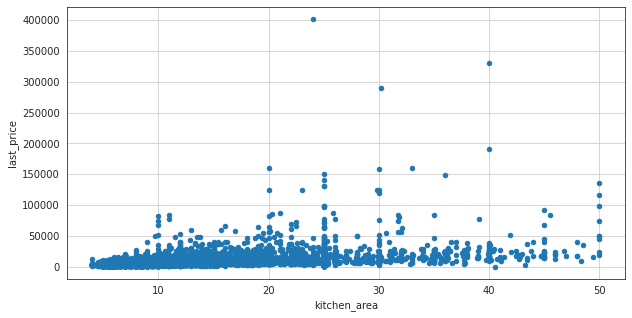

In [207]:
work_data.plot.scatter(y='last_price', x='kitchen_area', grid=True, figsize=(10, 5))

##### Корреляция цены и числа комнат.

In [168]:
work_data['last_price'].corr(work_data['rooms'])

0.333798976972733

Зависимость цены от числа комнат равна зависимости с кухней. Корреляция составляет 0.33

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

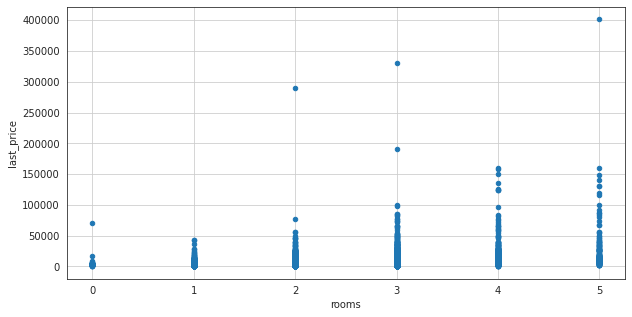

In [208]:
work_data.plot.scatter(y='last_price', x='rooms', grid=True, figsize=(10, 5))

##### Корреляция цены и категории этажа

Поскольку корреляция между числами и строками не получается, приведу строки к id. 
<a id='price_floor_corr'></a>

In [169]:
work_data['floor_category'].unique()

array(['Не крайний этаж', 'Первый этаж', 'Последний этаж'], dtype=object)

In [170]:
def floor_ids(row):
    if 'Первый этаж' in row:
        return 1
    elif 'Последний этаж' in row:
        return 2
    return 0

work_data['floor_category_id'] = work_data['floor_category'].apply(floor_ids)

/tmp/ipykernel_68/3821944593.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_data['floor_category_id'] = work_data['floor_category'].apply(floor_ids)


In [171]:
work_data['last_price'].corr(work_data['floor_category_id'])

-0.027917874332467372

Корреляция выглядит почти нулевой: -0.03. Зависимости просто нет. 

<AxesSubplot:xlabel='floor_category', ylabel='last_price'>

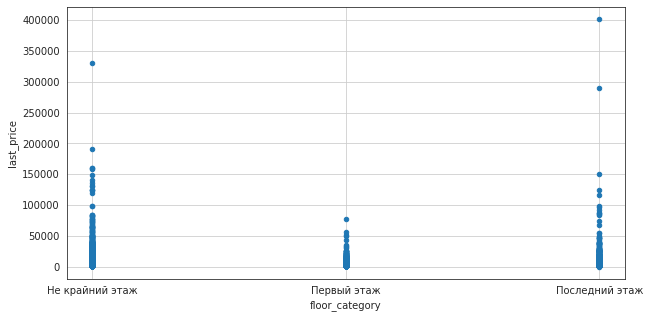

In [210]:
work_data.plot.scatter(y='last_price', x='floor_category', grid=True, figsize=(10, 5))

##### Корреляция цены и даты размещения

In [172]:
work_data['last_price'].corr(work_data['weekday'])

0.006063963353366047

In [173]:
work_data['last_price'].corr(work_data['month'])

-0.0016672410032026492

In [174]:
work_data['last_price'].corr(work_data['year'])

-0.047568035028105346

Корреляции между ценой и днём, месяцем или годом публикации ничтожны малы и напоминают ноль. Связи нет.

<AxesSubplot:xlabel='weekday', ylabel='last_price'>

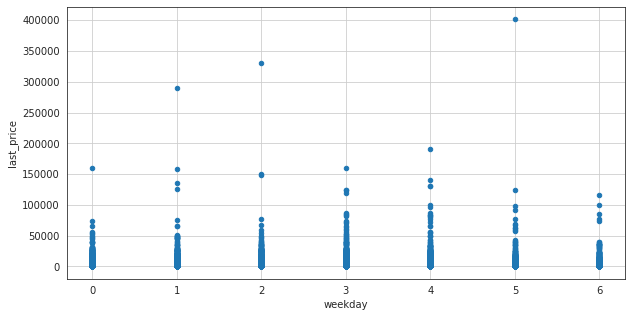

In [211]:
work_data.plot.scatter(y='last_price', x='weekday', grid=True, figsize=(10, 5))

<AxesSubplot:xlabel='month', ylabel='last_price'>

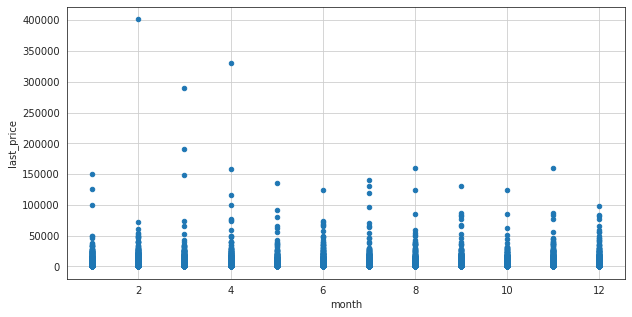

In [214]:
work_data.plot.scatter(y='last_price', x='month', grid=True, figsize=(10, 5))

<AxesSubplot:xlabel='year', ylabel='last_price'>

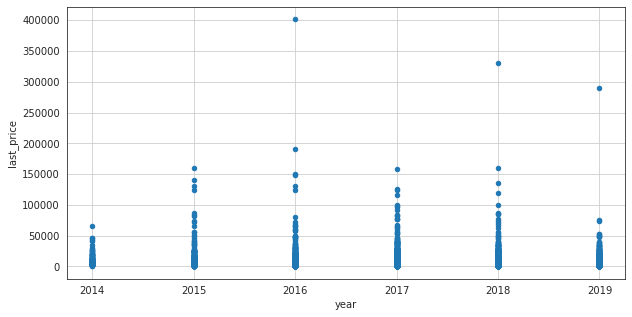

In [213]:
work_data.plot.scatter(y='last_price', x='year', grid=True, figsize=(10, 5))

Это не совсем требовалось, но всё построил таблицу корреляции для всего датасета. И зависимость тут только одна - между площадью общей и площадью жилой. Хотя это, возможно, результут медианных замен пропусков. Ведь по сути площадь кухни тоже должна зависеть от общей площади. Чуть меньшая связь, но всё же устойчивая - между числом комнат и жилой площадью (чуть меньше с общей).

In [175]:
work_data.corr()

,last_price,price_per_metre,total_area,living_area,kitchen_area,rooms,floor,floors_total,ceiling_height,parks_nearest,city_centers_nearest,city_centers_km,airports_nearest,weekday,month,year,days_exposition,floor_category_id
last_price,1.000000,0.760118,0.666228,0.517685,0.328189,0.333799,0.035380,0.016184,0.313486,-0.201177,-0.235740,-0.236367,-0.027152,0.006064,-0.001667,-0.047568,0.098827,-0.027918
price_per_metre,0.760118,1.000000,0.280862,0.169426,0.266480,0.005662,0.142296,0.174039,0.303517,-0.290344,-0.332635,-0.333524,-0.040839,-0.006739,-0.004375,0.015222,0.044460,-0.127752
total_area,0.666228,0.280862,1.000000,0.827470,0.385630,0.725323,-0.019948,-0.052247,0.370455,-0.167499,-0.220797,-0.221116,-0.018567,0.001031,0.008537,-0.088248,0.154765,0.018998
living_area,0.517685,0.169426,0.827470,1.000000,0.372573,0.770459,-0.096025,-0.146972,0.310125,-0.148717,-0.207163,-0.207463,-0.043416,0.011298,-0.007309,-0.052760,0.112362,0.053870
kitchen_area,0.328189,0.266480,0.385630,0.372573,1.000000,0.092856,0.130082,0.184354,0.256261,-0.042747,-0.151178,-0.151984,0.009402,0.018657,-0.007831,-0.022353,0.025746,-0.060804
rooms,0.333799,0.005662,0.725323,0.770459,0.092856,1.000000,-0.161324,-0.228963,0.171118,-0.119385,-0.153900,-0.153848,-0.052234,-0.000243,0.000767,-0.056048,0.115894,0.072037
floor,0.035380,0.142296,-0.019948,-0.096025,0.130082,-0.161324,1.000000,0.676803,-0.007401,0.083657,0.004698,0.004227,0.072952,0.010233,0.021976,0.005452,-0.038293,-0.070000
floors_total,0.016184,0.174039,-0.052247,-0.146972,0.184354,-0.228963,0.676803,1.000000,-0.021084,0.121420,0.007829,0.007279,0.108752,0.010937,0.018247,0.006432,-0.049126,-0.307488
ceiling_height,0.313486,0.303517,0.370455,0.310125,0.256261,0.171118,-0.007401,-0.021084,1.000000,-0.194411,-0.296699,-0.297255,-0.078489,-0.011218,0.002023,-0.053914,0.100372,0.018908
parks_nearest,-0.201177,-0.290344,-0.167499,-0.148717,-0.042747,-0.119385,0.083657,0.121420,-0.194411,1.000000,0.184102,0.184976,0.015773,0.003947,-0.001277,0.039205,-0.036976,-0.008275


#### Средняя цена квадратного метра в 10 нас. пунктах с наибольшим числом объявлений

In [177]:
cities = data.pivot_table(index='locality_name', values='price_per_metre', aggfunc=('count', 'mean'))
cities.columns = ['Количество объявлений', 'Средняя цена за метр, тыс. руб.']

In [178]:
print(cities.sort_values(by='Количество объявлений', ascending=False).head(10))

                 Количество объявлений  Средняя цена за метр, тыс. руб.
locality_name                                                          
Санкт-Петербург                  14747                       113.378484
Мурино                             545                        85.857358
Кудрово                            454                        95.421916
Шушары                             416                        78.081899
Всеволожск                         378                        68.708254
Пушкин                             349                       102.467020
Колпино                            325                        75.166308
Парголово                          305                        89.792623
Гатчина                            293                        68.903072
Выборг                             230                        57.974304


In [179]:
cities['Средняя цена за метр, тыс. руб.'].describe()

count    301.000000
mean      44.487144
std       20.465737
min       11.206667
25%       30.556000
50%       40.789063
75%       56.763333
max      120.575238
Name: Средняя цена за метр, тыс. руб., dtype: float64

<AxesSubplot:>

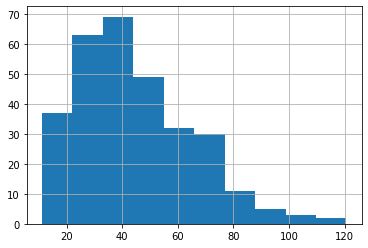

In [180]:
cities['Средняя цена за метр, тыс. руб.'].hist()

Десятку начинает Санкт-Петербург с ценой квадратного метра 113.3 тысячи. На втором месте Пушкин - 102.5 тысячи рублей. Самая низкая цена в Выборге - 58 тысяч рублей за один квадрат. 

Среднее значение по всему датафрейму - 44.5 тысячи рублей, медина - 40.8 тысячи рублей. Третий квартиль - 56.8 тысячи. И все они ниже, чем средние цены за метр в первых десяти нас. пунктах. Максимальная цена - 120.6 тысячи, что ненамного выше средней по Петербургу. Однако склонен считать, что здесь могли сыграть роль выбросы в виде 500-метровых квартир и цен выше миллиарда. 

#### Средняя цена каждого километра

In [181]:
kilometers = (data
              .query('locality_name == "Санкт-Петербург"')
              .pivot_table(index='city_centers_km', values='price_per_metre', aggfunc=('count', 'mean'))
             )

In [182]:
kilometers.sort_values(by='city_centers_km', ascending=False).head(10)

,count,mean
city_centers_km,,
29.0,6,72.955000
28.0,7,81.162857
27.0,2,132.115000
26.0,31,87.646129
25.0,23,90.083043
24.0,26,85.736923
23.0,80,91.594875
22.0,194,90.753711
21.0,108,93.333889


In [183]:
kilometers.sort_values(by='city_centers_km', ascending=True)

,count,mean
city_centers_km,,
0.0,20,248.604500
1.0,172,174.807035
2.0,270,158.349407
3.0,311,121.602540
4.0,615,129.416699
5.0,816,138.066311
6.0,551,144.047695
7.0,388,152.364098
8.0,559,123.347442


<AxesSubplot:xlabel='Удалённость от центра, км', ylabel='Кол-во квартир, единиц'>

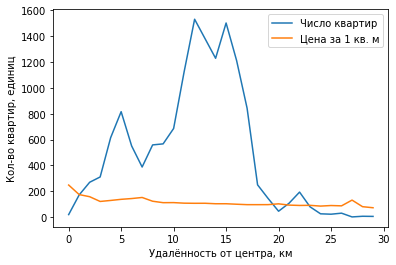

In [188]:
kilometers.columns = ['Число квартир', 'Цена за 1 кв. м']
kilometers.plot(xlabel='Удалённость от центра, км', ylabel='Кол-во квартир, единиц')

Однозначно близость к центру является поводом для роста стоимости одного квардратного метра. Однако на расстоянии 27 км от центра стоимость метра составляет 132 тысячи, что даже выше, чем на расстоянии 4 км от центра. Чем обусловлен столь явный выброс, можно изучить. Стоит отметить, что это Царское село, а потому, возможно, цена связана с туристической привлекательностью. В основном же наблюдается тенденция на понижение. Причём значительная. Если в центре метр стоит 248.6 тысячи, то уже в 10 км всего 112.2 тысячи рублей. Разница в два раза. В 29 км от центра метр стоит 73 тысячи, то есть, в 3.4 раза меньше. Это существенная разница, присущая крупным городам с развитыми инфраструктурой и туристическим бизнесом.

### Общий вывод

Для исследования были предоставлены данные за **2014-2019** годы. 

    Год  - Кол-во

    2019 - 2713

    2018 - 8032

    2017 - 7681

    2016 - 2637

    2015 - 1106

    2014 - 129
    
**Всего** данных: 23699 записей. После очистки **осталось** 22298 записей. **Удалены** 5.91% записей, **проанализировано** 94.09% записей. 

<hr>

# Описание данных, которые предоставили: 
- **Фотографии**: от нуля до чуть более 20. Пик на 5-10, 10-15 (более 7 тысяч и 6 тысяч соответственно). При этом много и нулевых значений, то есть, объявлений без фото вообще.

- **Цена**: на момент снятия с публикации - нечто непонятное. От 0 до 1 млрд. Рассморим подробно позднее.

- **Общая площадь**: примерно до 100 метров в наибольшем количестве. Более 20000. От 100 до 200 метров ещё примерно 1800-2000 объектов и незначительное число жилья выходит за 200 метров. Его, *возможно*, отброшу, так как не самое типичное жильё, которое для средних объектов только мажет картину.

- **Жилая площадь**: до 40-45 метров. Более 15 тысяч значений. Ещё около 5000 значений - до 80-90 метров, небольшой хвост за сто метров и уж совсем тонкий хвостик к двумста метрам. По всей видимости, всё же придётся отсечь квартиры более 200 метров общей площади. 

- **Площадь кухни**: почти 17000 значений - до 12 метров. От 12 до чуть менее 25 ещё около 3000. Остальные свыше 25 метров и по числу незначительны.

- **Комнаты**: имеют чёткий ноль. Грустно. Будем смотреть по площади, что там может быть. Плюс, как вариант, это могут быть студии и апартаменты. Узнаем дальше. **Основная масса** похожа на 2-3 комнаты. 

- **Высота потолков**: без нуля, что бесконечно радует. Однако чуть ли не до 10 метров, а это уже явные описки в объявлениях. Нужно будет отработать. 

- **Этаж**: преобладание 1-4 этажей (чуть выше 12 тысяч), затем от 4 до 8 (около 5 тысяч) и до 10 этажа ещё примерно 3000 и далее по ниспадающей до 27-28 примерно. Более точно посмотрим потом, если пригодится. 

- **Этажность**: основная масса напоминает 1-5 этажи (примемрно 7 тысяч), что не особо удивительно для Петербурга и предместий. Далее от 5 до 12 (около 8 тысяч, что тоже не удивительно для нового Ленинграда и ближайших наспунктов типа Шушар). Примерно 4000 на 12-18 этажей и от 18 до 22-23 ещё примерно 2000. Чуть меньше до 30 этажаей, а ещё есть хвост до почти 40, что напоминает уже выброс. Да и этажности такой в С.-Пб. и рядом я не припомню. 

- **Балконы**: всё в принципе логично, кроме 4-5 балконов. С другой стороны, есть недвижимость с кучей лоджий/балконов, которые расположены в каждой комнате. Пока за выброс не считаю.

- **Близость аэропорта**: довольно спорный момент с точки зрения удобства. С одной стороны, можно сдавать для приезжих, с другой - шумно ужасно. **Основная** масса от 10 до 32 км с пиком в районе 19-23 км. На 3 и 4 местах до 40 и до 50 км (3 и 2 тысячи значений). и далее до почти 80. 

- **Расстояние о центра Петербурга**: чуть более 15 тысяч значений это расстоянияя до 20 км. Из них наиболее близкие (от 0 до 9 км) - немногим больше 3 тысяч. Ещё в районе 2.5 тысяч единиц - жильё на расстоянии от 20 до 40 км от центра города. 

- **Парки**: более 10000 значений говорят об отстутствии парков радиусе 3 км. Довольно странно для Петербурга. Вопрос, кто что считает парком и парковой зоной? Просто ставили 0? Чуть менее 6 тысяч значений - 1 парк. Чуть менее 2 тысяч - 2 парков. И около 6-7 сотен на три парка. Больше всего парков на **расстоянии** до 1 км - почти 8000. С пиком в районе 500 метров. 

- **Пруды**: то же, что с парками по числу. С той лишь разницей, что ноль - около 7 тысяч значений, а 3 - почти 2 тысячи. По **расстоянию** пруды похожи на парки также - более 8000 значений до 1 км, причём половина - до 500 метров. 

- **Дни публикации**: хочу сразу отметить, что снятие с публикации не является подтверждением факта продажи. Опыт говорит, что примерно не менее четверти объявлений снимают из-за отмены продажи. То есть, снятие публикации через неделю, месяц, два не говорит, что квартиру продали в 25% случаев. Это и полная отмена, и смена риелтора, когда позднее новый снова даст объявление, и просто пауза на время. Ну и к гистограмме. У нас 13.42% пропусков в этом столбце. **Основная** масса данных же говорит, что срок публикации примерно 150-160 дней. Это около 13000 значений. Ещё почти 4000 это значения от 150-160 до 320 дней. Что довольно много. Далее хвост от примерно 1900 в сторону **трёхлетнего** срока публикации. Вполне возможно, но проверить стоит.
<hr>

# Процесс подготовки данных к анализу: 

1. Я [убрал](#floors_ejection) ***выбросы по этажности*** домов на основании того факта, что максимальная этажность жилой недвижимости в Петербурге - 37 этажей. В Ленобласти это 28 этажей. Пытаться изменить данные на какие-то иные не особо целесообразно, так как процент ничтожен. 


2. Изначально в данных было 86 ***пропусков***, которые позднее превратились в 84 в процессе зачистки иных параметров. Можно было бы предположить, что указанные этажи по сути являются и последними, а потому этажность не была указана, но эта гипотеза не может быть проверена, а потому вряд ли имеет смысл приравнивать значения, спасая их. Я [удалил](#floors_drops) их.


3. Я привёл [значения](#cities) ***населённых пунктов*** к единому виду, убрав как лишние слова и символы, так и неявные дубли. 


4. Отработав по ***балконам***, [сократил](#balcony) их количество до адекватного - 3. Кроме того, заменил в оставшихся данных число балконов, превышающее число помещений, указав значение "1". Нельзя исключать, что я не прав, но это видится наиболее логичным. 


5. Заменил ***типы данных*** в [столбцах](#types) **апартаменты** `is_apartment` на `bool`; **дату** выставления объявления `first_day_exposition` на `datetime`; **балконы** `balcony` и **этажность** ([здесь](#floors_int)) `floors_total` на `int64`.


6. Переимновал [столбцы](#columns), которые требовали этого: `cityCenters_nearest`, `parks_around3000` и `ponds_around3000`.


7. Убрал [выбросы](#rooms) по ***комнатам***. Предполагаю, что элитная недвижимость нас пока не интересует.


8. Проработал ***высоту потолков***, [заменив](#ceil) пустые значения медианной высотой. Как мы помним, среднее значение и медиана были практически идентинчы.

9. Отработал [парки](#parks). Все пустоты заменил нулями. Пустые расстояния до парков были именно в пустотах по числу парков. Причина проста: нет парка, человек не отмечает. Ни наличие, ни расстояние.


10. Апартаменты. [Изменил](#apart) на False. Почему? Потому что не отметили в 99% случаев именно потому, что это квартиры настоящие. 1%, я уверен, это всё же апартаменты, но вряд ли они сыграют большую роль. Всего пропусков по апартаментам - 20159. Если 1% из этих данных - апартаменты, мы получим 202 апартамента, что от текущих данных составит всего 0.89%. Кроме того, апартаменты не участвуют в исследовании и в принципе их можно не трогать. Посмотрим. Ведь "а вдруг?"


11. Жилая площадь имеет 1819 пропуска. Это много. [Заменил](#living) её на медиану. 


12. Площадь кухни имеет 2178 пропуска. Решение выше. [Заменил](#kitchen) её на медиану. 


13. Дни размещения. Не трогал. Продажи могут быть как быстрыми, так и обычными, длинными. Абсолютно любыми. И гадать, подставляя на место пропусков значения как средние, так и медианные, считаю не особо этичным. У нас есть 96.23% данных от начального уровня. С учётом пропусков по срокам размещения у нас от текущих данных нет 13.17%, однако даже 86.82% данных хватит для того, чтобы сделать достаточно верные выводы. 

*Если бы я умел, то написал бы плотные фильтры, чтобы по ним усреднить значения, но вряд ли сейчас это мне про силам. Предположительно сделал бы категоризацию так. Нас. пункт, число комнат, метраж, стоимость 1 метра для создания категорий. По ним сроки  продажи, и потом по ним бы и подставил. Но не уверен, что это будет верным. Есть ощущение, что всё равно это даст слишком приблизительные значения*. 


14. Цена объекта пропусков нет. [Поменял](#tysrub) значения на "тыс. руб.", привёл к `int`.


15. Общее количество этажей в доме, подчищено. Инфа выше.


16. Пруды. Не участвуют в исследовании. Однако пустоты заменил на нули, а пропуски в расстояниях соответствуют нулям. 


17. Смена типов данных для: 
- количество прудов и парков,
- расстояние до оных в метрах.

**В прудах и парках расстояния в пустотах поставил 10000. Это позволило не менять формат на `object` и оставить данные годными для расчётов**.

18. Я добавил в таблицу новые столбцы: [день, месяц, год](#wme) и цену [квадратного метра](#ppm).

19. Я создал [категории этажей](#category_floors): первый, последний и не крайний. 

20. Перевёл [метры в километры](#center) в расстоянии до центра и округлил их.

21. Перевёл цены в [тысячи рублей](#tysrub)

22. Создал [новую таблицу](#table) с меньшим числом столбцов. И сейчас, когда я пишу это после исследования, могу сказать, что забыл добавить в неё целых три столба, а потому в итоге объём занимаемой памяти с исправлением ошибки получился почти таким же, каким был в первой таблице. Однако так всё же лучше было рисовать общие гистограммы.

Весь процесс очистки и приведения к текущему виду описан в подитогах [1](#1), [2](#2) и [3](#3).
<hr>

# Собственно, к анализу


1. **На стоимость недвижимости** влияют два фактора: 

    1.1. Удалённость от центра Петербурга (или от Петербурга вообще).
    
    1.2. Общая площадь квартиры. Здесь влияние не столь значительно, коэффициент Пирсона всего 0.67, однако сложно не оценить влияние, если цена за метр 50 тысяч при метраже 30 или 50 метров. То есть, влияние есть. 
 
 
2. Такие факторы, как близость парка, аэропорта, число комнат или площадь жилая и кухни, не влияют на стоимость квадратного метра или общую. Смотри [корреляцию](#corr).


3. **В Петербурге продаётся 14747 квартир**. Это 66.14% от всего исследуемого жилья. Если же прибавить к нему Мурино, Кудрово и Шушары, то это 72.48% от всех объявлений. Объясняется довольно просто - столица региона и приграничные города. Отсюда и цены на жильё. Сюда же можно добавить Парлогово. Это всё те пункты, куда есть даже быстрая курьерская доставка. 


4. Пустоты, они же пропуски и ошибки в основной массе являются ошибками, которые создал пользователь. Где-то были записаны неверные значения, где-то не указал данные. Единственными пропусками, которые мне видятся техническими или возникшими уже после подготовки файла - пропуски в сроке размещения объявления. Это чисто техническая информация, и от пользователя она не зависит.


5. Вряд ли можно говорить о каких-то мошеннических действиях со стороны пользователей. Единственное, что приходит на ум, не совсем чистоплотное ведение дел, когда для завышения цены дают объявления с несуществующими данными, а кроме того, дают объявления с крайне заманчивыми предложениями, которые также являются обманом, чтобы просто получить звонок и предложить что-то иное. Каких-то аномалий, которые говорили бы о мошенниках, не обнаружил. Например, нет объявлений для обналичивания средств материского капитала, где цены на недвижимость в те годы варьировались от 30 до 100 тысяч за дом в глухой деревне. 

<hr>

6. **Метраж**. 

   6.1. **Общая** площадь в среднем 51.4 - 58.0 кв. метра. Больше всего продаётся квартир площадью от 30 до 70 метров. [Пики](#total_peeks) говорят о том, что продаётся недвижимость в классических домах: 5- и 9-этажках. 
   
   6.2. **Жилая** Более 1/4 квартир с жилой площадью менее 20 метров - 5831. Это можно объяснить продажей комнат в коммуналках, небольших студий, и малосемеек ("гостинок"). Есть пики на площади 25-30 метров с понижением к 37. Это стандарт для однокомнатных квартир и двушек старого образца. Много квартир с жилой площадью около 50 метров. Он объясняется большим числом квартир с общей площадью свыше 80 метров. [Пики](#living_peeks) подтверждают гипотезу в пункте 6.1.
   
   6.3. Площадь **кухонь**. Среднее значение 11.65 кв. м. Медиана - 9.80 кв. м, и она намного ближе к истинному среднему значению. Влияние на среднее оказано огромными кухнями под 50 метров. И, хотя их довольно мало, влиять они могут. Плюс к ним кухни площадью 25 метров. Их достаточно много, почти 3000 записей. [График](#kitchen_peeks) вполне ясно показывает пики. Основная масса кухонь в районе от 5 до 10 метров, что обусловлено типами продаваемой недвижимости: от "хрущёвок" до девятиэтажек серий 125, 90 и прочих. 
   
   
7. **Цены на жильё**. 

    7.1. Среднее значение стоимости 6 млн рублей, а медиана резко занижена - 4.6 млн рублей. Судя по [графикам](#prices), эта цена ближе к истине. Разброс основного количества цен от 3.5 до 6.0 млн. Далее стоимость постепенно повышается до 103-105 млн, снижаясь по числу объектов, а затем и вовсе очень медленно растёт до 4 млрд.
    
    7.2. Средняя стоимость одного квадратного метра от 94625 до 98177 рублей. График можно увидеть [здесь](#ppmet).
    
 
8. **Комнатаж**. 94% всех квартир: 1-, 2- и 3-комнатные. При этом 1- и 2-комнатных примерно поровну: по 7.7 тысяч. Это можно объяснить тем, что чаще всего покупают жильё для съезда от родителей, для совместного проживания молодой семьи, при расширении семьи при рождении ребёнка. Причём рождение ребёнка не всегда играет роль в комнатности прирбретаемой недвижимости. Кто-то от родителей или из коммуналки уежает в 1-комнатную. Однако это не из исследования, а опыта риелторской деятельности. [График](#rooms_num).


9. **Высота потолков**. Преобладают классические значения для типовых домов: 2.5 - 2.7 метра. За ними идут потолки до 3 метров, что тоже является в какой-то мере классикой. [График](#ceils).


10. **Этажи и этажность**. Среди [этажей](#floors_1) преобладают до 5-го включительно, второе место - до 9-го. Среди этажности та же тенденция: пятиэтажки и [девятиэтажки](#floors_2). Среди **типов этажей** преобладают средние, что логично, ибо количество первых и последних этажей в разы меньше, чем иных. Что же касается числа, то первых несколько меньше, чем последних, а в общем их чуть более четверти от всех [объявлений](#floors_3).


11. **Расстояние до центра** у всех разное. Все по-разному оценивают как центр, так и метод измерения до него. Графики [здесь](#center_1). В основном продаётся недвижимость до 20 км от центра. По сути - всё, что до КАД. 


12. **Расстояние до аэропорта** в основном расстояния от 10 до 40 км от [аэропорта](#aero). 


13. **Расстояние до парка**. Свыше 14 000 значений вообще не имеют парка рядом. Остальные дают [разброс](#parks_1), где основная масса парков на расстояния до 750 метров. Но и есть и до 3000 метров.


14. **Дни публикации** объявления примерно [равны](#d) за исключением выходных. Там большое проседание. Видимо, за счёт того, что в выходные показы и в принципе АН не работают, кроме риелторов. 


15. **Месяц публикации**. Здесь [заметны](#mon) спады (январь, май и декабрь) и пики - февраль и март, ноябрь. Обусловлено праздниками и отпусками. Рост в ноябре не особо очевиден, так как обычно осенний пик приходится на сентябрь, пору после отпуков. Возможно, графики отдыха несколько иные в Петербурге, что и влияет. 


16. **Срок продажи** в [среднем](#time) занимает 3 месяца. Есть довольно много объявлений с публикацией до 30 дней, что может быть объяснено пробой продажи, выставлением собственником и потом заключением договора с риелтором, сроком публикации и не продлением. Есть выбросы на 45 и 60 днях. Возможно, это сроки публикации и отсутствие продления либо платные услуги без продления.
<hr>
   
    
**Важно учитывать тот факт, что цены с годами росли, а потому одни и те же квартиры в разные годы будут стоить совершенно разных денег**
